<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/Hybrid_Model_linear_nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#instalações e importações

In [ ]:
pip install statsforecast

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf
import statsmodels.api as sm
import yfinance as yf
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import pandas as pd
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA


#carregamento dos conjuntos

In [ ]:
url_1 = "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/sunspot.csv"
sunpot_data = pd.read_csv(url_1)

url_2= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE//main/Datasets/US-UK.csv"
exchange_data= pd.read_csv(url_2)

url_3= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/lynx.csv"
lynx_data= pd.read_csv(url_3)

url_4= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/nikkei225.csv"
nikkei225_data= pd.read_csv(url_4)

#lynx
####the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934

In [ ]:
#lynx
lynx_data.head()

,year,value
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


In [ ]:
lynx_data.tail()

,year,value
109,1930,662
110,1931,1000
111,1932,1590
112,1933,2657
113,1934,3396


In [ ]:
lynx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
print(lynx_data.index)
print(type(lynx_data.index))

RangeIndex(start=0, stop=114, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
lynx_data["year"] = pd.to_datetime(lynx_data["year"], format="%Y")

# Definir 'year' como índice
lynx_data.set_index("year", inplace=True)

# Se o índice for do tipo PeriodIndex, converta para Timestamp
if isinstance(lynx_data.index, pd.PeriodIndex):
    lynx_data.index = lynx_data.index.to_timestamp()


In [ ]:

# Ordenar os dados por data (boa prática)
lynx_data=lynx_data.sort_index()

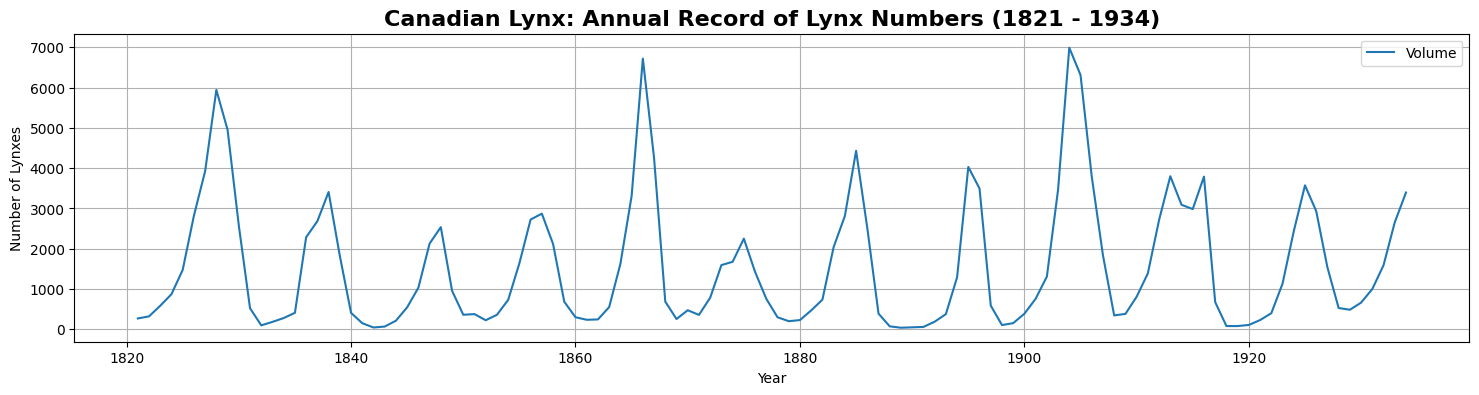

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(lynx_data.index, lynx_data["value"], label='Volume') # Capitalized 'Volume' for consistency

plt.title("Canadian Lynx: Annual Record of Lynx Numbers (1821 - 1934)", fontsize=16, fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Lynxes") # More specific label
plt.grid(True)
plt.legend()
plt.show()

#sunpot
####The sunspot data considered in this paper include the annual number ofsunspot from 1700 to 1987

In [ ]:
#sunpot
print("primeiros anos registrados")
sunpot_data.head()

primeiros anos registrados


,year,value
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [ ]:
print("ultimos anos registrados")
sunpot_data.tail()

ultimos anos registrados


,year,value
284,1984,45.9
285,1985,17.9
286,1986,13.4
287,1987,29.2
288,1988,100.2


In [ ]:
sunpot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    289 non-null    int64  
 1   value   289 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.6 KB


In [ ]:
print(sunpot_data.index)
print(type(sunpot_data.index))

RangeIndex(start=0, stop=289, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
# Converter a coluna 'year' para datetime no formato de ano
sunpot_data["year"] = pd.to_datetime(sunpot_data["year"], format="%Y", errors='coerce')

# Definir 'year' como índice
sunpot_data.set_index("year", inplace=True)

# Garantir que o índice seja datetime (Timestamp), não Period
if isinstance(sunpot_data.index, pd.PeriodIndex):
    sunpot_data.index = sunpot_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
sunpot_data = sunpot_data.sort_index()


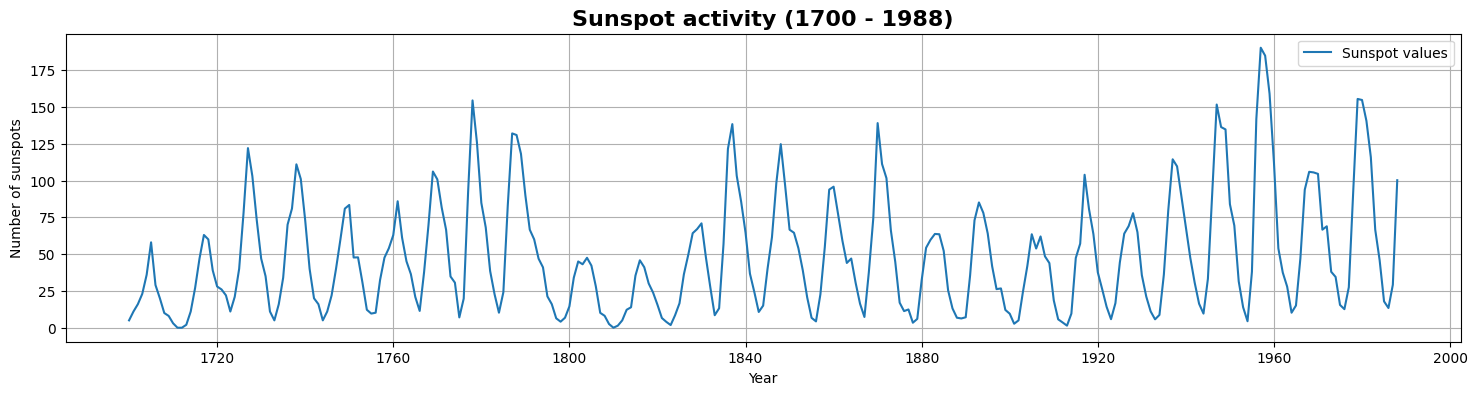

In [ ]:
plt.figure(figsize=(18, 4)) # Create the first figure
plt.plot(sunpot_data.index, sunpot_data["value"], label='Sunspot values') # Plot sunspot data

# Correct title for the sunspot plot
plt.title("Sunspot activity (1700 - 1988)", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of sunspots") # Corrected label
plt.grid(True)
plt.legend()
plt.show() # Display the first plot


#exchange rate
####The exchange rate data set used in this paper contains weekly observations from 1980 to 1993

In [ ]:
exchange_data.head()

,observation_date,DEXUSUK
0,1980-01-05,2.2370
1,1980-01-12,2.2570
2,1980-01-19,2.2855
3,1980-01-26,2.2610
4,1980-02-02,2.2740


In [ ]:

exchange_data.tail()

,observation_date,DEXUSUK
725,1993-11-27,1.4795
726,1993-12-04,1.4900
727,1993-12-11,1.4945
728,1993-12-18,1.4910
729,1993-12-25,1.5030


In [ ]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  730 non-null    object 
 1   DEXUSUK           730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [ ]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#weekly observations from 1980 to 1993
exchange_data["observation_date"] = pd.to_datetime(exchange_data["observation_date"])
exchange_data.set_index("observation_date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(exchange_data.index, pd.PeriodIndex):
    exchange_data.index = exchange_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
exchange_data = exchange_data.sort_index()

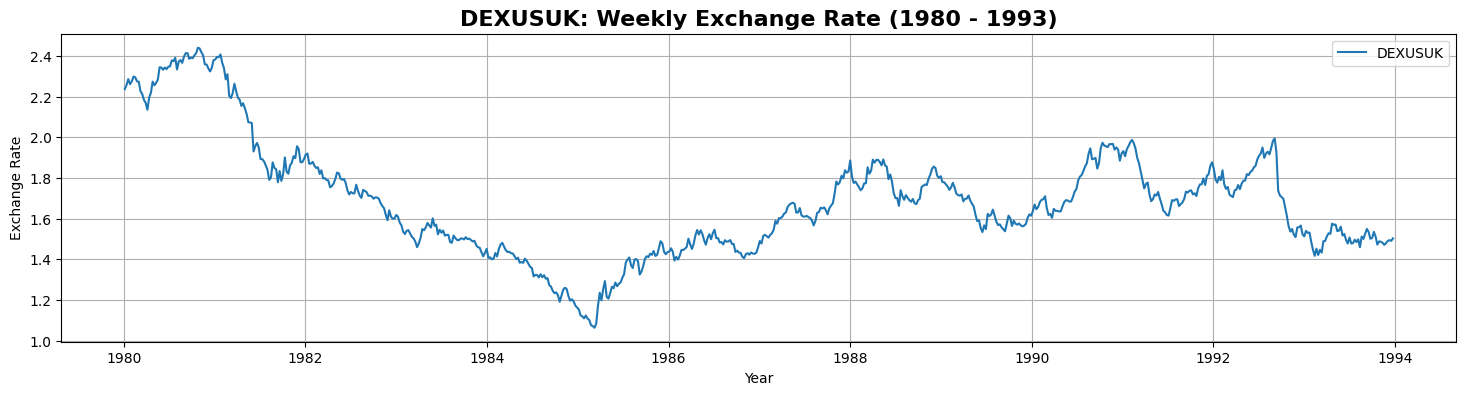

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(exchange_data.index, exchange_data["DEXUSUK"], label='DEXUSUK') # Plot the actual data

plt.title("DEXUSUK: Weekly Exchange Rate (1980 - 1993)", fontsize=16, fontweight='bold') # Correct title placement
plt.xlabel("Year") # Appropriate label for time series
plt.ylabel("Exchange Rate") # Correct label for exchange rate
plt.grid(True)
plt.legend() # Show the label 'DEXUSUK'
plt.show()

#nikkie225
>
The closing Nikkei 225 index (N225) data set covers daily stock
prices from 2006/03/03 to 2010/04/01

In [ ]:
nikkei225_data.tail()

,date,value
995,2010-03-26,10996.370117
996,2010-03-29,10986.469727
997,2010-03-30,11097.139648
998,2010-03-31,11089.940430
999,2010-04-01,11244.400391


In [ ]:
nikkei225_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1000 non-null   object 
 1   value   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#2006/03/03 to 2009/06/05
nikkei225_data["date"] = pd.to_datetime(nikkei225_data["date"])
nikkei225_data.set_index("date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(nikkei225_data.index, pd.PeriodIndex):
    nikkei225_data.index = nikkei225_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
nikkei225_data =nikkei225_data.sort_index()

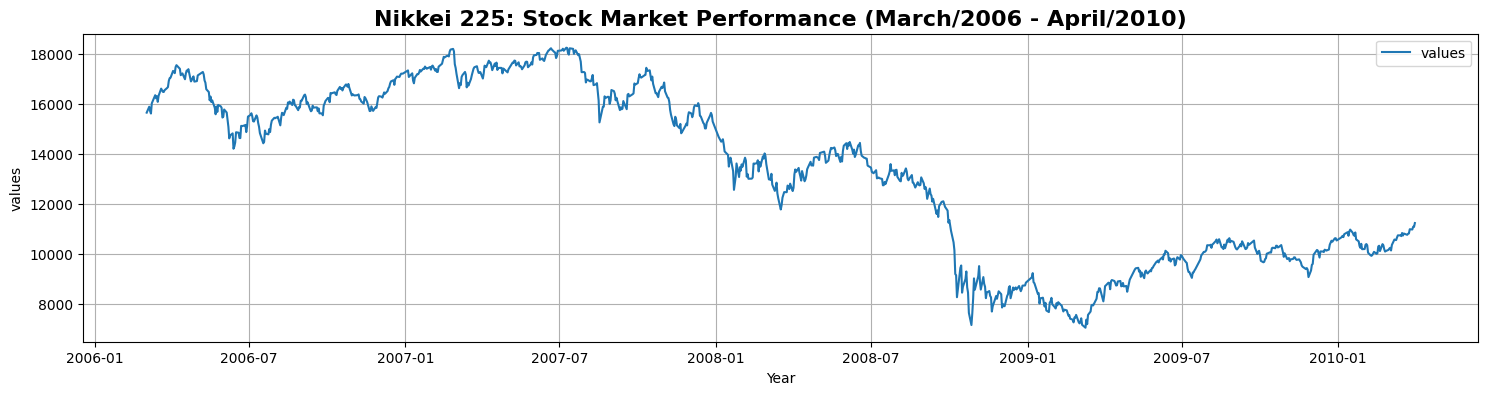

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(nikkei225_data.index, nikkei225_data["value"], label='values')

# --- Here's the improved title setup ---
plt.title("Nikkei 225: Stock Market Performance (March/2006 - April/2010)", fontsize=16, fontweight='bold')
# --- End of improved title setup ---

plt.xlabel("Year") # Changed to "Ano" for Portuguese
plt.ylabel("values")
plt.grid(True)
plt.legend() # Don't forget to add legend if you have labels
plt.show()

#acf antes pacf

In [ ]:
#need to be in ingles
def gerar_graficos_temporais(df, titulo):
    import pandas as pd
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    import matplotlib.pyplot as plt

    col = df.columns[0]
    serie = df[col].dropna()


    # Inferência da frequência
    freq = pd.infer_freq(df.index)
    print(f"[INFO] Plotando série: {col} — Frequência inferida: {freq}")

    # Escolha inteligente de reamostragem
    if freq in ['D', 'B', 'W', None]:
        serie_agg = serie.resample('ME').mean()
        agg_label = 'Média Mensal'
    elif freq in ['A', 'AS', 'Y']:
        serie_agg = serie.resample('2A').mean()
        agg_label = 'Média Bienal'
    elif freq in ['M', 'MS']:
        serie_agg = serie  # Já está em base mensal
        agg_label = 'Série Original (Mensal)'
    else:
        serie_agg = serie
        agg_label = 'Série Original'

    # Número seguro de defasagens
    lags = min(20, len(serie) // 2)

    # Gráficos
    plt.figure(figsize=(12, 10))

    # 1. Série original
    plt.subplot(4, 1, 1)
    plt.plot(serie, color='blue')
    plt.title(f'{titulo} - Série Original')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 2. Série reamostrada
    plt.subplot(4, 1, 2)
    plt.plot(serie_agg, color='green')
    plt.title(f'{titulo} - {agg_label}')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 3. ACF
    plt.subplot(4, 1, 3)
    plot_acf(serie, lags=lags, ax=plt.gca())
    plt.title(f'{titulo} - Autocorrelação (ACF)')
    plt.grid(True)

    # 4. PACF
    plt.subplot(4, 1, 4)
    plot_pacf(serie, lags=lags, ax=plt.gca(), method='ywm')
    plt.title(f'{titulo} - Autocorrelação Parcial (PACF)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


[INFO] Plotando série: value — Frequência inferida: YS-JAN


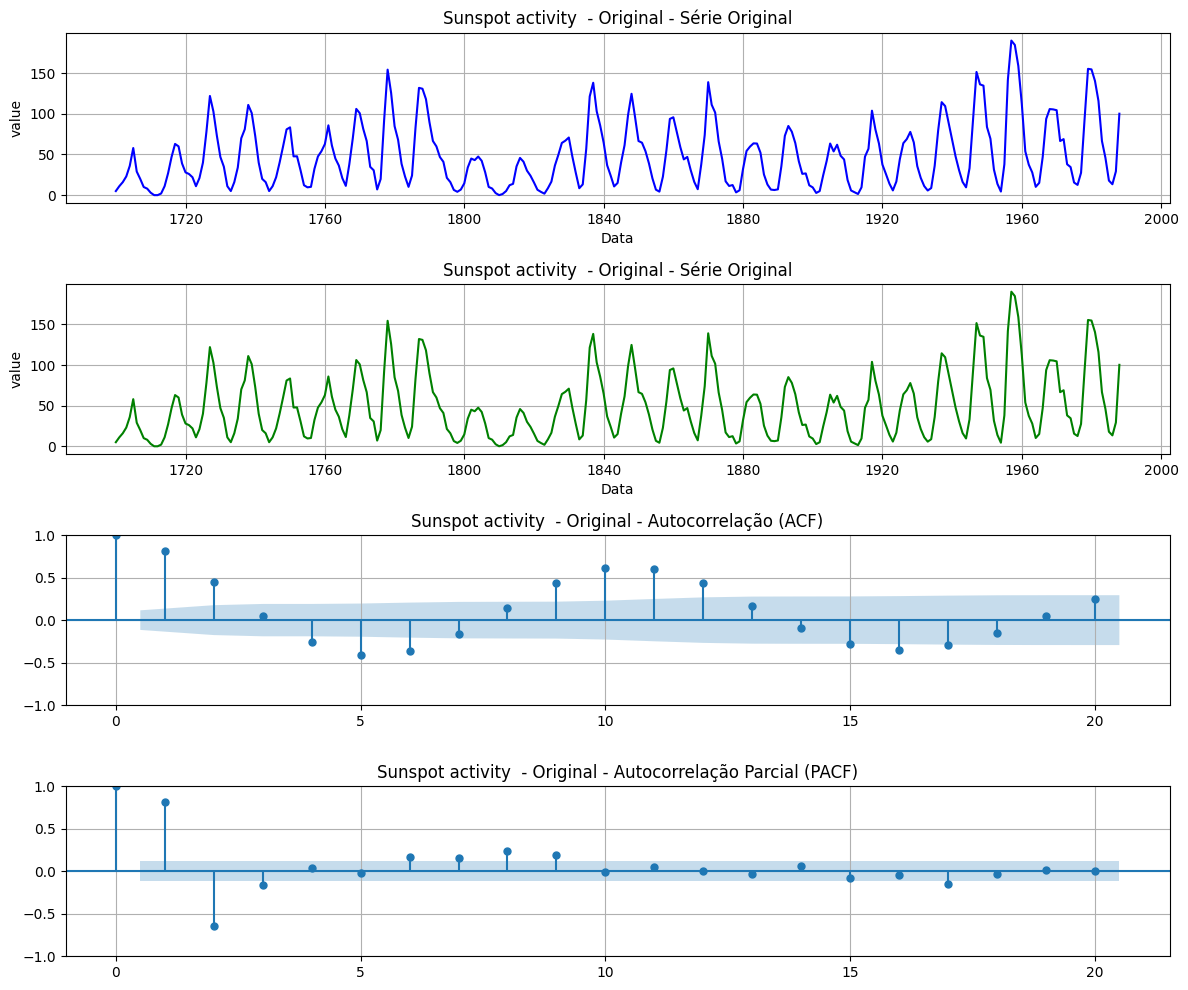

In [ ]:
gerar_graficos_temporais(sunpot_data, "Sunspot activity  - Original")

[INFO] Plotando série: value — Frequência inferida: YS-JAN


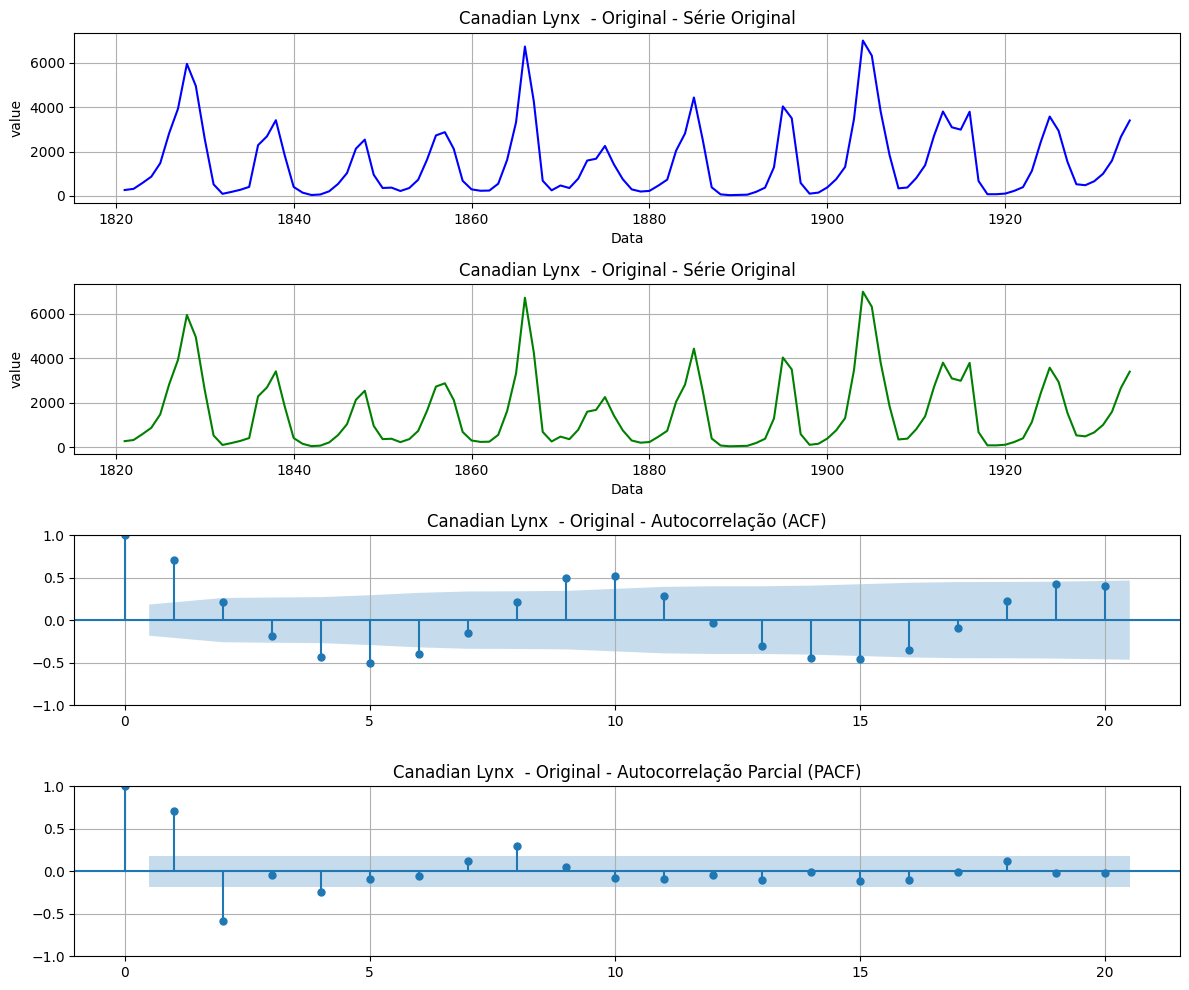

In [ ]:
gerar_graficos_temporais(lynx_data, "Canadian Lynx  - Original")

[INFO] Plotando série: DEXUSUK — Frequência inferida: W-SAT


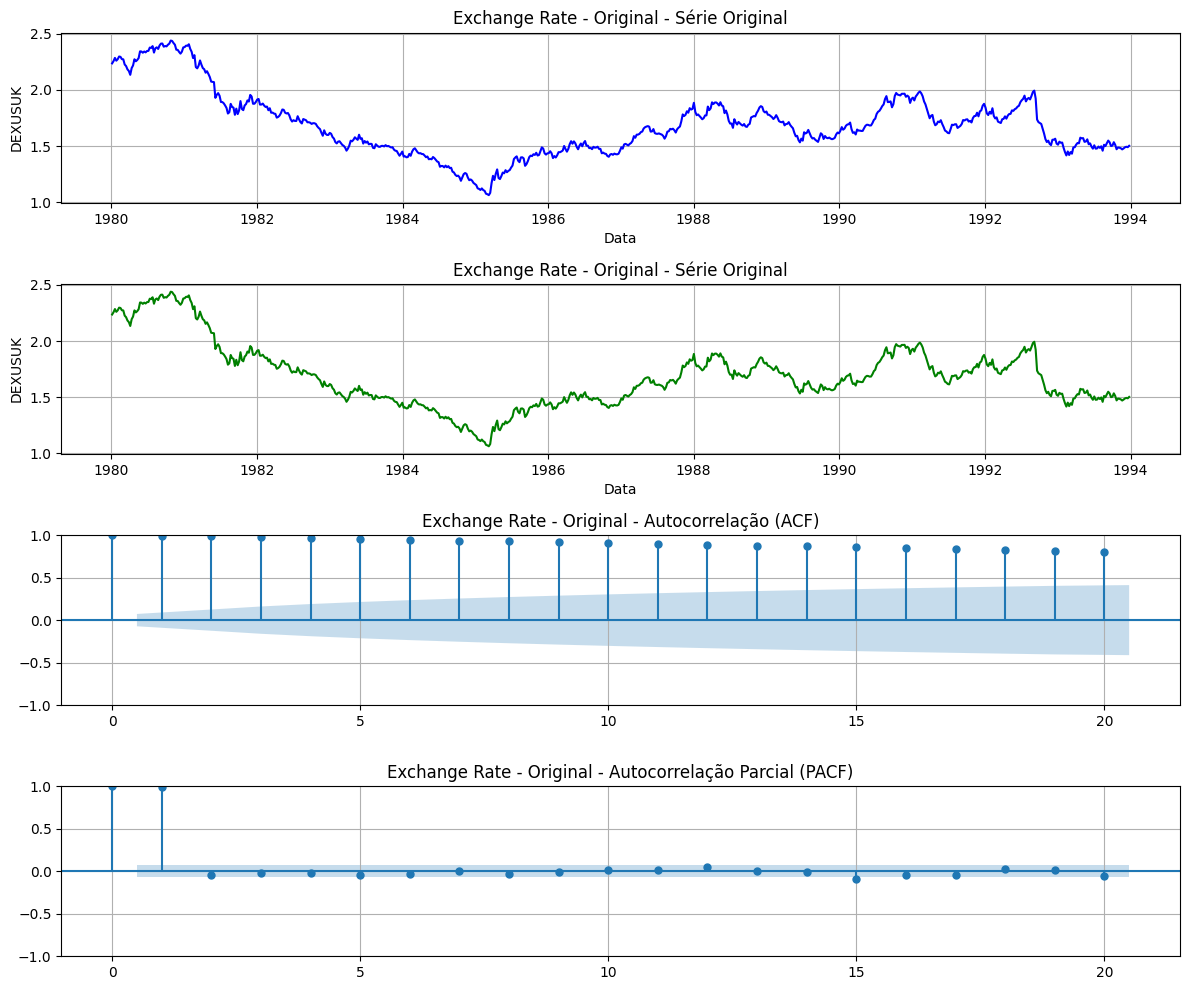

In [ ]:
gerar_graficos_temporais(exchange_data, "Exchange Rate - Original")


[INFO] Plotando série: value — Frequência inferida: None


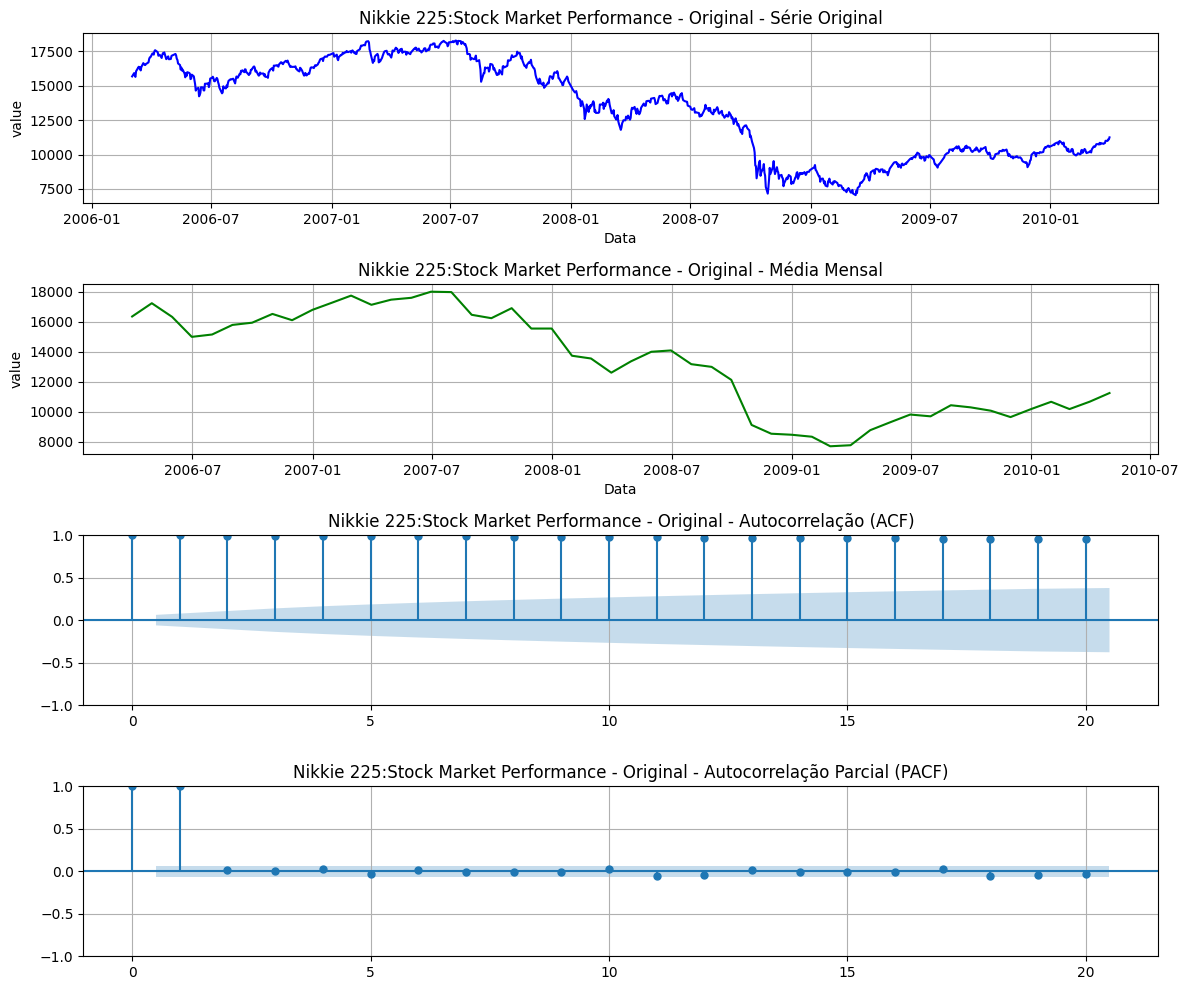

In [ ]:
gerar_graficos_temporais(nikkei225_data, "Nikkie 225:Stock Market Performance - Original")

#decomposição


📊 Performing Seasonal Decomposition for 'Exchange Rate' (Column: DEXUSUK, Period: 7)


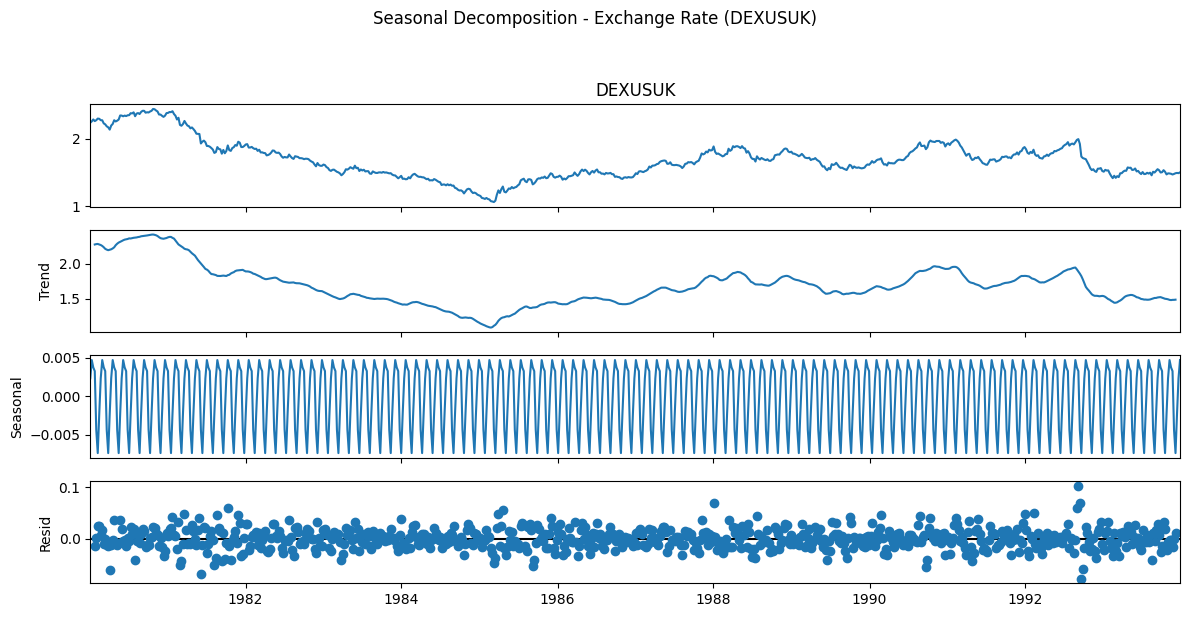


📊 Performing Seasonal Decomposition for 'Sunspot Activity' (Column: value, Period: 12)


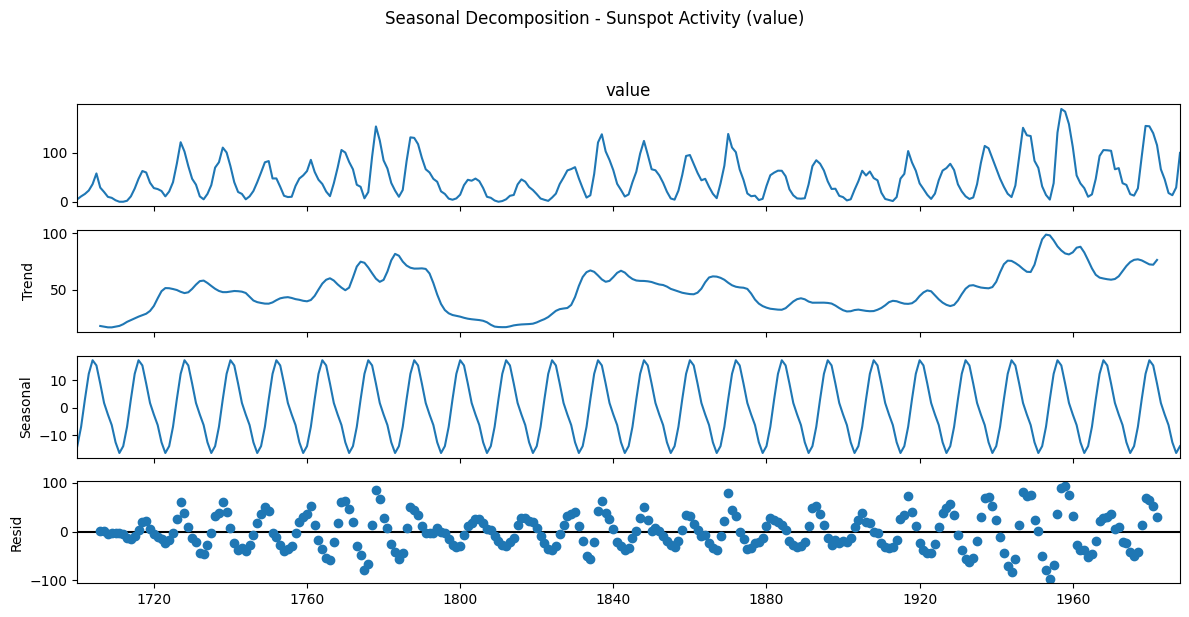


📊 Performing Seasonal Decomposition for 'Lynx Trappings' (Column: value, Period: 12)


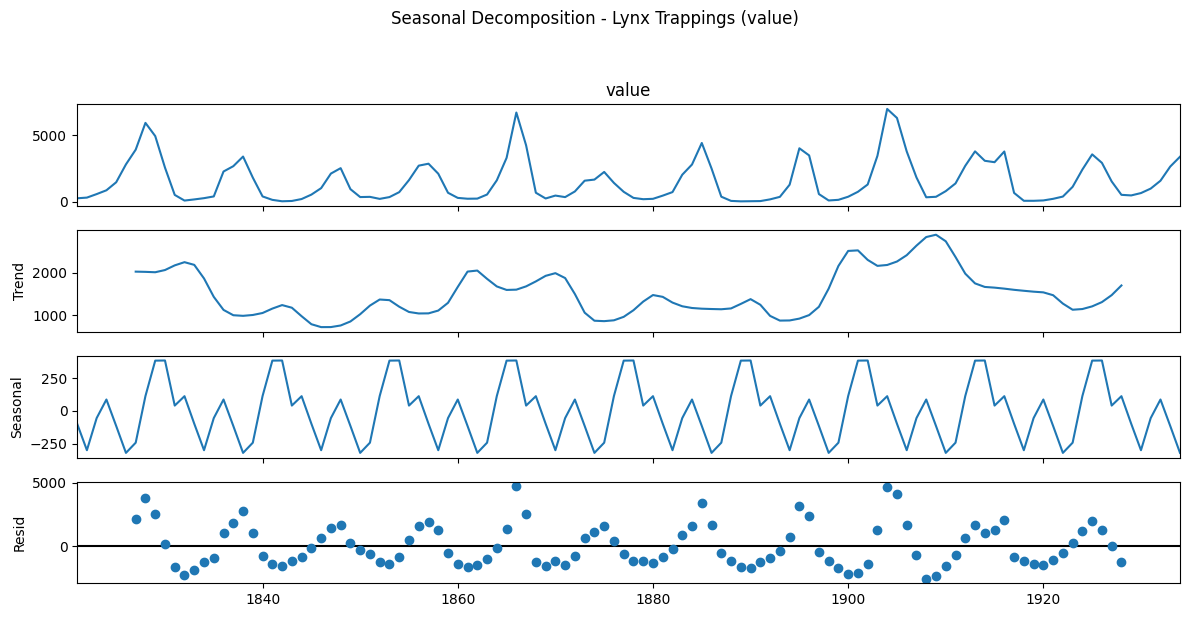


📊 Performing Seasonal Decomposition for 'Nikkei 225' (Column: value, Period: 365)


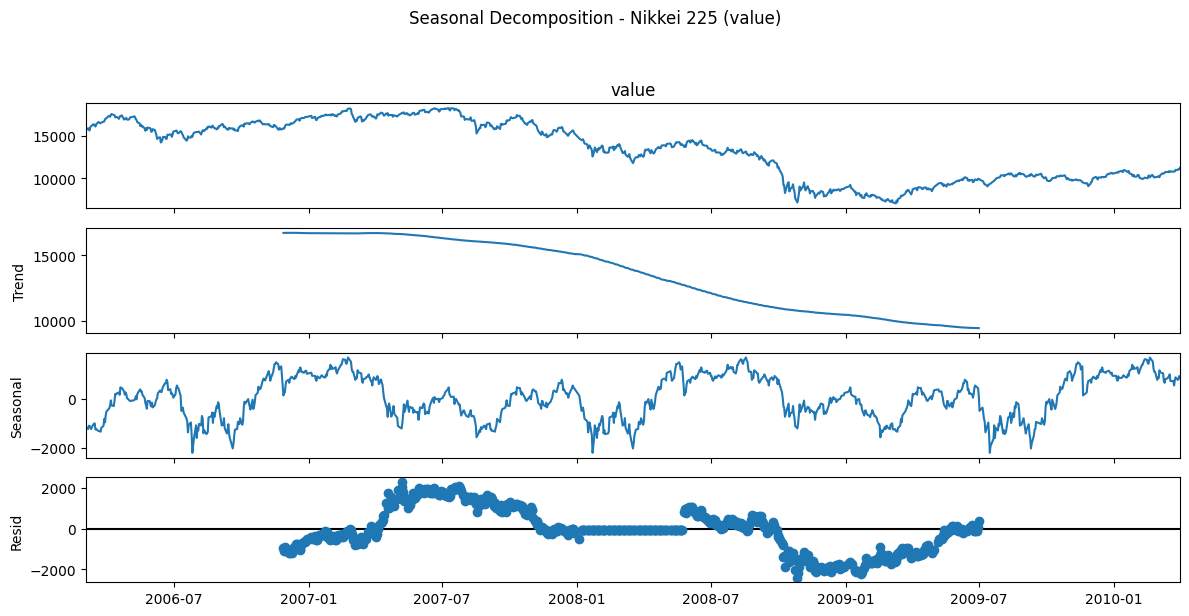

In [ ]:
data_to_analyze = [
    # Weekly data, so a 7-day period (weekly cycle) is appropriate.
    {"name": "Exchange Rate", "df": exchange_data, "value_col": "DEXUSUK", "seasonal_period": 7},

    # Annual data. If looking for the ~11-year cycle, `seasonal_decompose` can use that.
    # If no "within-year" seasonality is expected, set to None.
    {"name": "Sunspot Activity", "df": sunpot_data, "value_col": "value", "seasonal_period": 12}, # Approx 11-year cycle

    # Annual data. Lynx cycles are around 9-10 years.
    # If no "within-year" seasonality is expected, set to None.
    {"name": "Lynx Trappings", "df": lynx_data, "value_col": "value", "seasonal_period": 12}, # Approx 9-year cycle

    # Daily data. Common periodicities are 5 (trading week), 7 (calendar week), or 365 (yearly).
    {"name": "Nikkei 225", "df": nikkei225_data, "value_col": "value", "seasonal_period": 365} # Trading week seasonality
]

# (Your `testar_season_decomp` function code remains the same as provided in your prompt)
def testar_season_decomp(data_configurations: list):
    """
    Performs seasonal decomposition for multiple time series and plots the components.

    Args:
        data_configurations (list): A list of dictionaries, where each dictionary should contain:
                                    - "name" (str): A descriptive name for the series.
                                    - "df" (pd.DataFrame): The DataFrame containing the time series.
                                    - "value_col" (str): The name of the column to analyze.
                                    - "seasonal_period" (int): The period of the seasonality
                                                               (e.g., 12 for monthly, 7 for weekly).
                                                               If None, decomposition is skipped for that series.
    """
    for config in data_configurations:
        name = config.get("name")
        df = config.get("df")
        value_col = config.get("value_col")
        period = config.get("seasonal_period")

        if not all([name, isinstance(df, pd.DataFrame), value_col]):
            print(f"Skipping invalid configuration: {config}. Missing name, DataFrame, or value_col.")
            continue

        if value_col not in df.columns:
            print(f"Error: Column '{value_col}' not found in DataFrame for '{name}'. Skipping.")
            continue

        serie = df[value_col].dropna()

        if period is None:
            print(f"\n🚫 Skipping seasonal decomposition for '{name}' (Column: {value_col}): No seasonal period specified.")
            continue

        # seasonal_decompose requires at least two full periods to work correctly
        if len(serie) < 2 * period:
            print(f"\n⚠️ Skipping seasonal decomposition for '{name}' (Column: {value_col}): Not enough data for period={period} (need at least {2*period} observations).")
            continue

        print(f"\n📊 Performing Seasonal Decomposition for '{name}' (Column: {value_col}, Period: {period})")

        try:
            # Model='additive' is suitable when seasonal fluctuations are roughly constant.
            # Model='multiplicative' is suitable when seasonal fluctuations grow/shrink with the level of the series.
            # Choose the model appropriate for your data.
            decomposicao = seasonal_decompose(serie, model='additive', period=period)

            # Plot the components
            fig = decomposicao.plot()
            fig.set_size_inches(12, 6) # Make the plot a bit larger for readability
            plt.suptitle(f"Seasonal Decomposition - {name} ({value_col})", y=1.02)
            plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
            plt.show()
        except Exception as e:
            print(f"An error occurred during decomposition for '{name}': {e}")

            # Define o nome do arquivo, combinando o nome da série e a coluna
            filename = f"decomposicao_{name.replace(' ', '_').replace('/', '_')}_{value_col}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo como: {filename}")



# --- Call the function with your data ---
if __name__ == "__main__":
    testar_season_decomp(data_configurations=data_to_analyze)

#estacionalidade para todo os conjuntos


In [ ]:
#need to chance to ingles
def tornar_estacionaria(df, nome="Série", max_diff=3):
    col_name = df.columns[0]
    current_serie = df[col_name].dropna().copy()
    differentiated_order = 0  # contador de quantas vezes foi diferenciada

    print(f"\n📊 Análise de Estacionaridade - {nome}")
    print(f"Coluna analisada: {col_name}")

    # --- Teste ADF na série original ---
    adf_result = adfuller(current_serie)
    print(f"\n🔍 Série Original:")
    print(f"  ADF Statistic: {adf_result[0]:.4f}")
    print(f"  p-value: {adf_result[1]:.4f}")
    print(f"  Valores Críticos: {adf_result[4]}")

    if adf_result[1] < 0.05:
        print("  ✅ A série é estacionária. Nenhuma diferenciação necessária.")
        return df.loc[current_serie.index]  # retorna a série original (sem diferenciação)

    print("  ❌ A série NÃO é estacionária. Tentando diferenciações...")

    # --- Diferenciação sucessiva ---
    for d in range(1, max_diff + 1):
        if len(current_serie) > 1:
            current_serie = current_serie.diff().dropna()
        else:
            print(f"  ⚠️ Série muito curta para diferenciar após {d-1} diferenciações.")
            break

        if len(current_serie) == 0:
            print(f"  ⚠️ Série vazia após {d} diferenciações. Não é possível testar.")
            break

        adf_diff = adfuller(current_serie)
        print(f"\n🔁 Série Diferenciada ({d}ª ordem):")
        print(f"  ADF Statistic: {adf_diff[0]:.4f}")
        print(f"  p-value: {adf_diff[1]:.4f}")
        print(f"  Valores Críticos: {adf_diff[4]}")

        if adf_diff[1] < 0.05:
            print(f"  ✅ A série diferenciada ({d}ª ordem) é estacionária.")
            differentiated_order = d
            break
        else:
            print(f"  ❌ Ainda NÃO é estacionária.")

    # --- Informativo final ---
    if differentiated_order > 0:
        print(f"✔️ A série '{nome}' foi diferenciada {differentiated_order} vez(es).")
    else:
        print(f"⚠️ A série '{nome}' NÃO estacionarizou após {max_diff} diferenciações.")

    # --- Retorna o DataFrame atualizado com a série transformada ---
    return pd.DataFrame({col_name: current_serie})


In [ ]:
exchange_data_est = tornar_estacionaria(exchange_data, "Exchange Rate")
sunspot_data_est = tornar_estacionaria(sunpot_data, "Sunspot")
lynx_data_est = tornar_estacionaria(lynx_data, "Lynx Trappings")
nikkei_data_est = tornar_estacionaria(nikkei225_data, "Nikkei 225")


📊 Análise de Estacionaridade - Exchange Rate
Coluna analisada: DEXUSUK

🔍 Série Original:
  ADF Statistic: -1.9903
  p-value: 0.2908
  Valores Críticos: {'1%': np.float64(-3.4393520240470554), '5%': np.float64(-2.8655128165959236), '10%': np.float64(-2.5688855736949163)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (1ª ordem):
  ADF Statistic: -26.1380
  p-value: 0.0000
  Valores Críticos: {'1%': np.float64(-3.4393644334758475), '5%': np.float64(-2.8655182850048306), '10%': np.float64(-2.568888486973192)}
  ✅ A série diferenciada (1ª ordem) é estacionária.
✔️ A série 'Exchange Rate' foi diferenciada 1 vez(es).

📊 Análise de Estacionaridade - Sunspot
Coluna analisada: value

🔍 Série Original:
  ADF Statistic: -2.3842
  p-value: 0.1462
  Valores Críticos: {'1%': np.float64(-3.453922368485787), '5%': np.float64(-2.871918329081633), '10%': np.float64(-2.5723001147959184)}
  ❌ A série NÃO é estacionária. Tentando diferenciações...

🔁 Série Diferenciada (

#comparando a serie antes e depois de sofrer diferenciação - grafico

In [ ]:
#needs to be chance to ingles
def compare_series(serie_original, serie_transformada, titulo='Comparação de Séries Temporais'):
    plt.figure(figsize=(14, 6))

    # Série original
    plt.subplot(2, 1, 1)
    plt.plot(serie_original, color='blue')
    plt.title(f'{titulo} - Série Original')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.grid(True)

    # Série transformada (ex: após diferenciação)
    plt.subplot(2, 1, 2)
    plt.plot(serie_transformada, color='green')
    plt.title(f'{titulo} - Série Após Diferenciação')
    plt.xlabel('Data')
    plt.ylabel('Valor Transformado')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


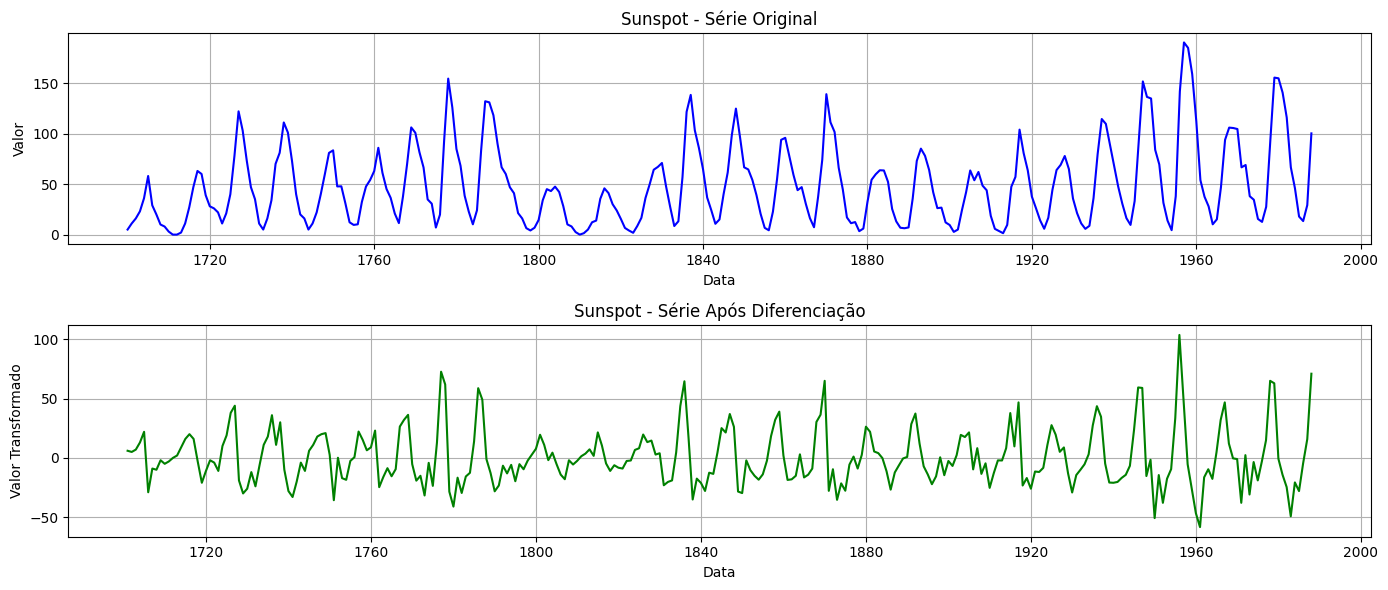

In [ ]:
compare_series(sunpot_data,sunspot_data_est,"Sunspot")

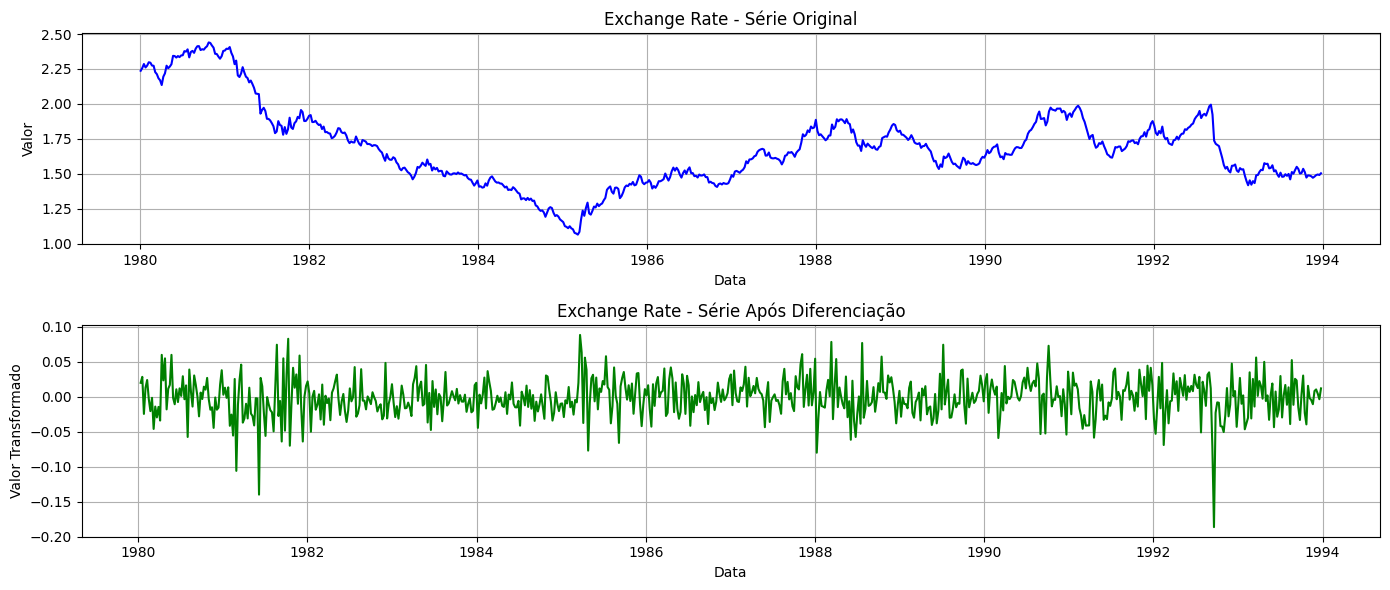

In [ ]:
compare_series(exchange_data,exchange_data_est,"Exchange Rate")

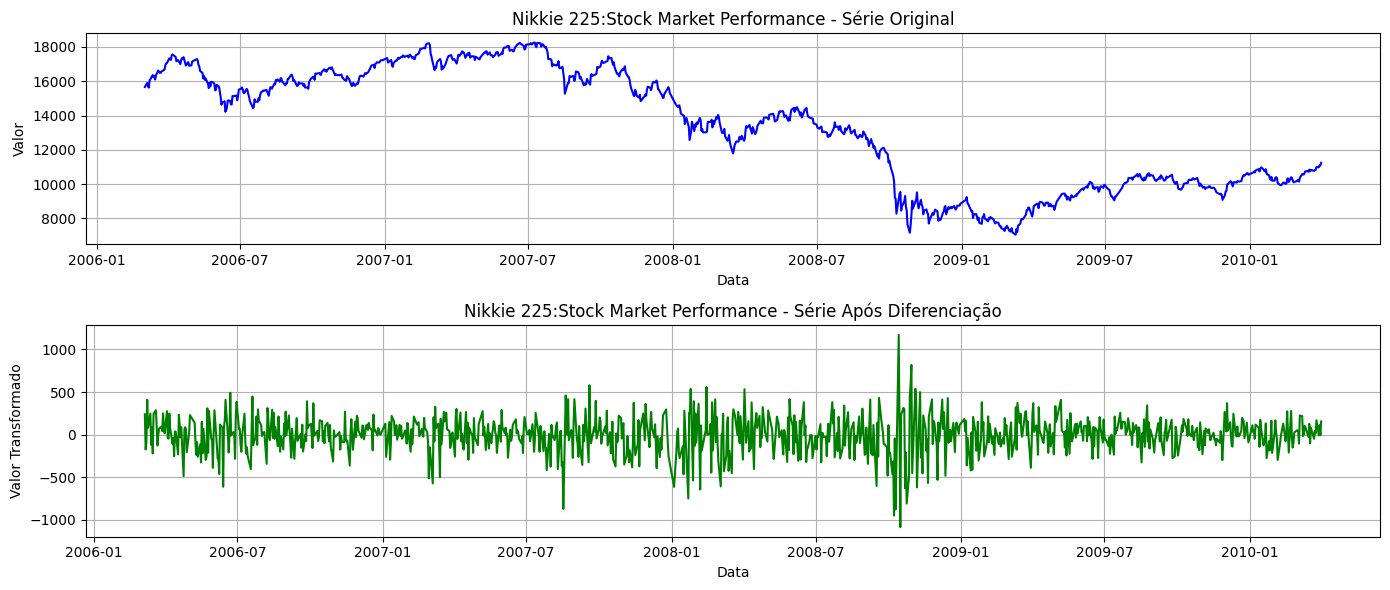

In [ ]:
compare_series(nikkei225_data,nikkei_data_est ,"Nikkie 225:Stock Market Performance")

#compare acf and pacf after and before

In [ ]:
def compare_series_acf_pacf(original_series, stationary_series, series_name, max_lags=40):
    """
    Plots and compares the ACF and PACF for an original time series and its stationary version.

    Args:
        original_series (pd.Series): The original time series.
        stationary_series (pd.Series): The stationary version of the time series (e.g., after differentiation).
        series_name (str): The name of the series for plot titles.
        max_lags (int): The maximum number of lags to display in the ACF/PACF plots.
                        Will be capped by the length of the series.
    """
    # Ensure inputs are pandas Series and drop NaNs if any
    original_series = original_series.squeeze().dropna()
    stationary_series = stationary_series.squeeze().dropna()

    # Calculate effective max_lags
    lags_original = min(max_lags, len(original_series) - 1)
    lags_stationary = min(max_lags, len(stationary_series) - 1)

    # Create a figure and a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'ACF and PACF Comparison for {series_name}', fontsize=16)

    # --- Row 1: Original Series ---
    # Plot ACF for Original Series
    plot_acf(original_series, ax=axes[0, 0], lags=lags_original)
    axes[0, 0].set_title(f'ACF - {series_name} (Original)')
    axes[0, 0].grid(True)

    # Plot PACF for Original Series
    plot_pacf(original_series, ax=axes[0, 1], lags=lags_original, method='ywm')
    axes[0, 1].set_title(f'PACF - {series_name} (Original)')
    axes[0, 1].grid(True)

    # --- Row 2: Stationary Series ---
    # Plot ACF for Stationary Series
    plot_acf(stationary_series, ax=axes[1, 0], lags=lags_stationary)
    axes[1, 0].set_title(f'ACF - {series_name} (After Differentiation)')
    axes[1, 0].grid(True)

    # Plot PACF for Stationary Series
    plot_pacf(stationary_series, ax=axes[1, 1], lags=lags_stationary, method='ywm')
    axes[1, 1].set_title(f'PACF - {series_name} (After Differentiation)')
    axes[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout, leaving space for suptitle
    plt.show()


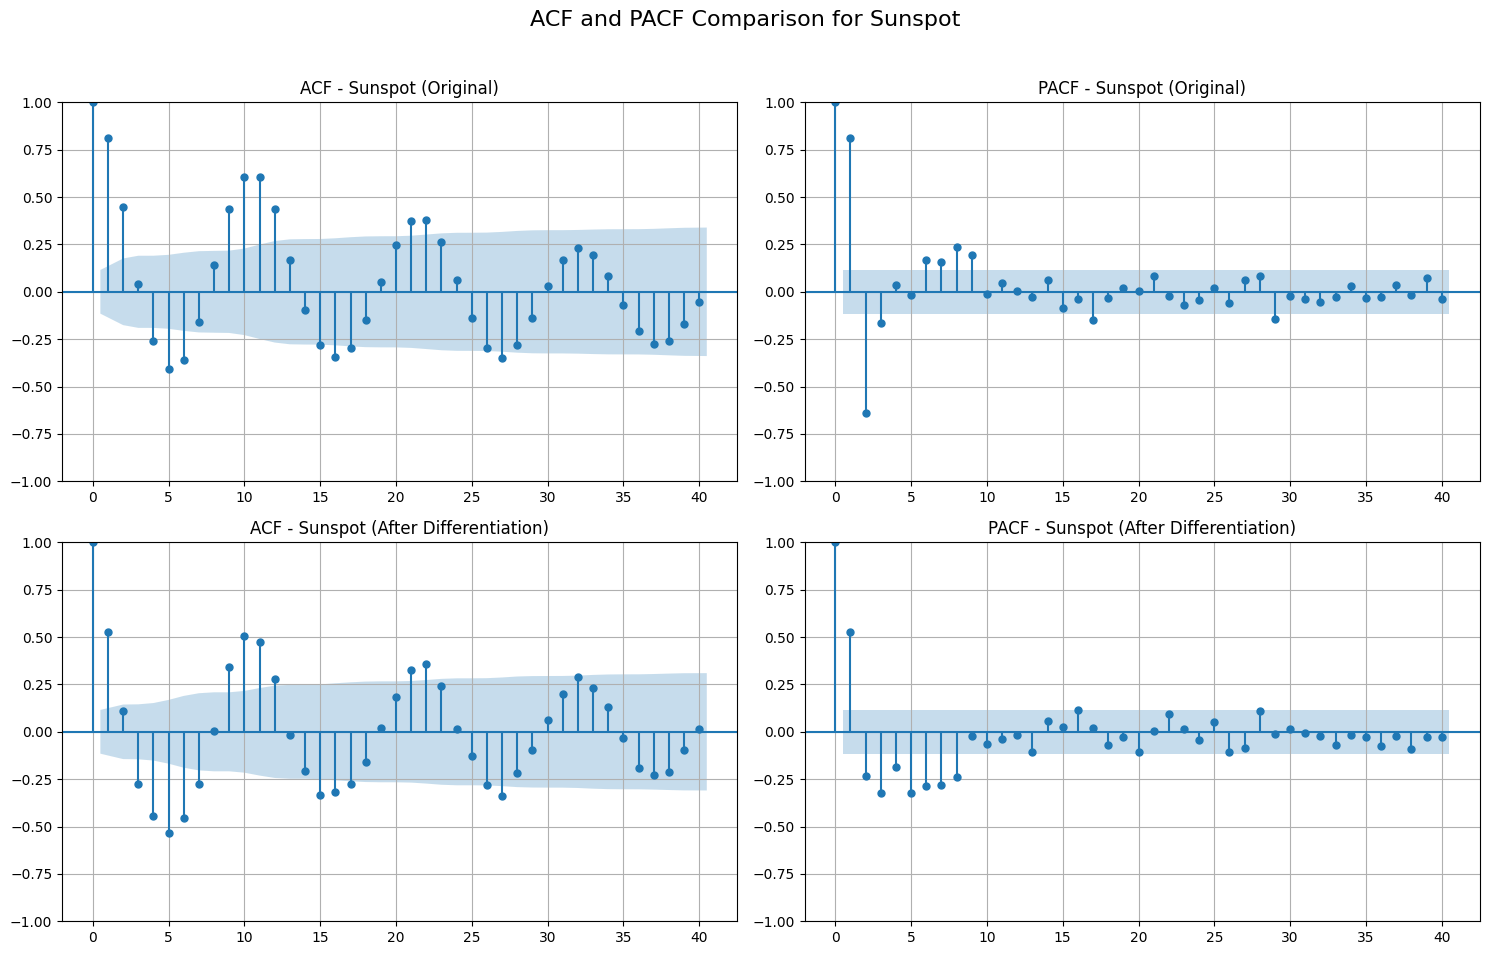

In [ ]:
compare_series_acf_pacf(sunpot_data,sunspot_data_est,"Sunspot")

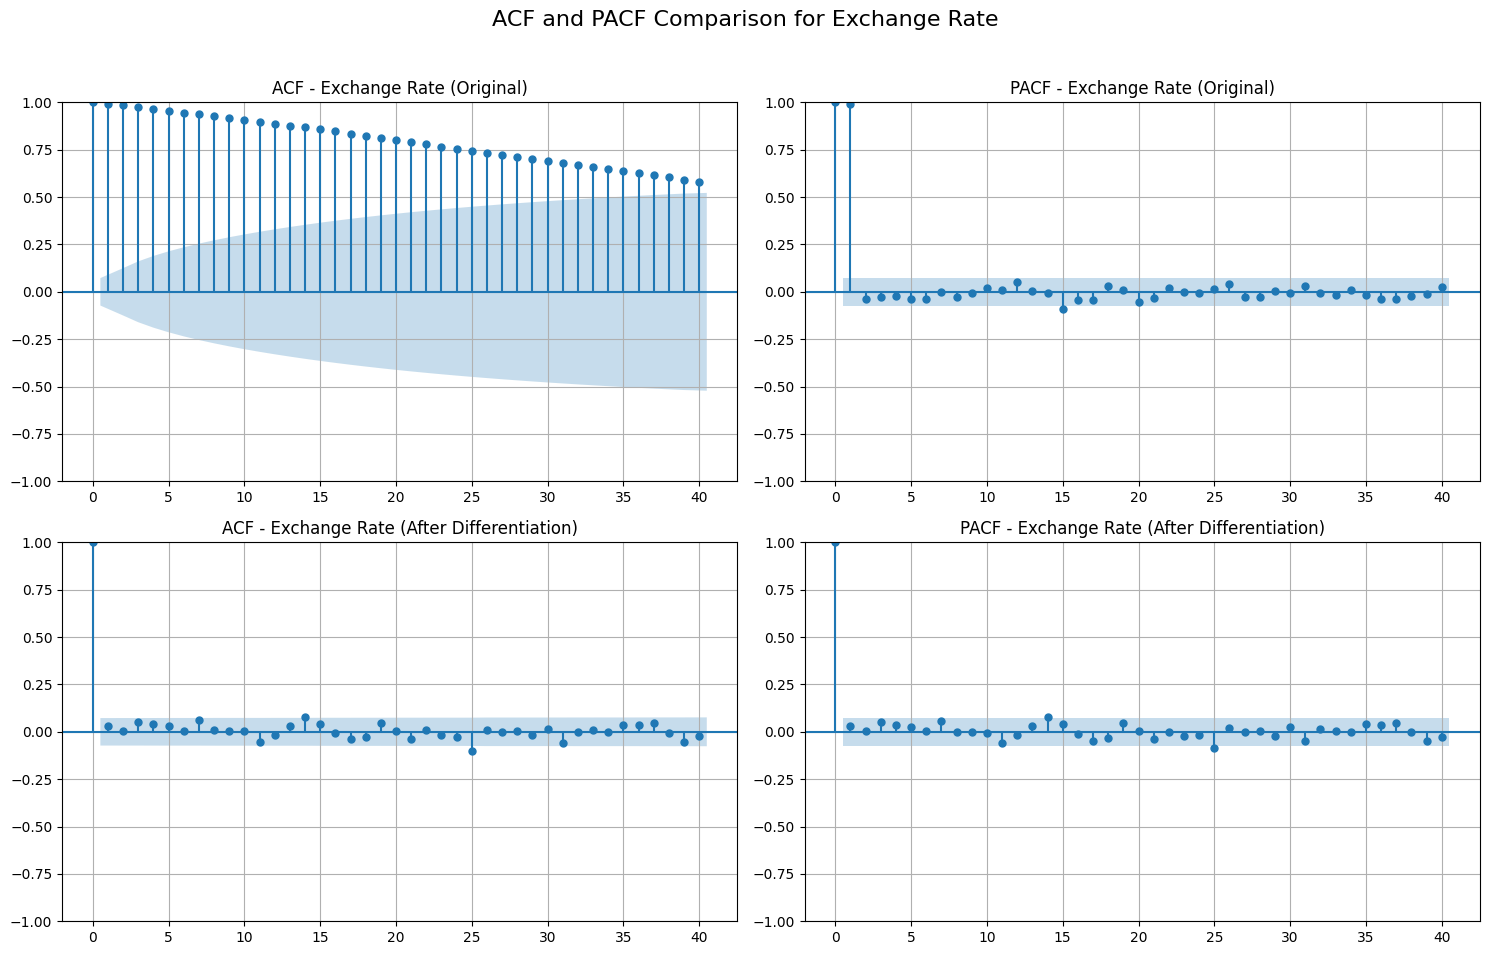

In [ ]:
compare_series_acf_pacf(exchange_data,exchange_data_est,"Exchange Rate")

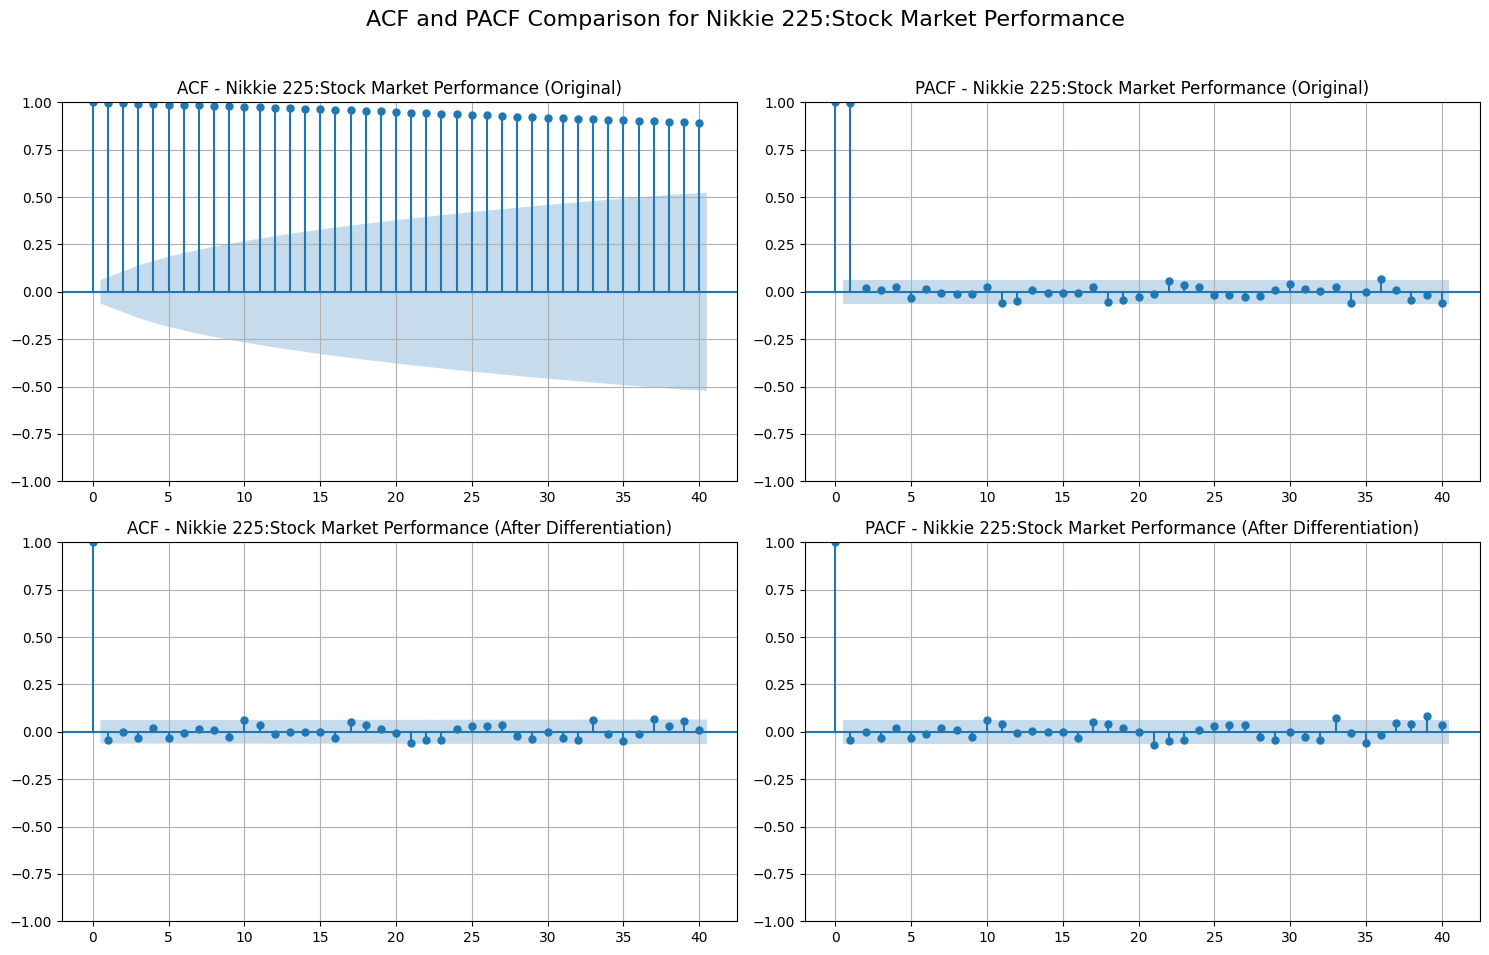

In [ ]:
compare_series_acf_pacf(nikkei225_data,nikkei_data_est ,"Nikkie 225:Stock Market Performance")

#olhando os conjuntos

In [ ]:
print("--- exchange_data_est.head() ---")
print(exchange_data_est.head())
print("\n--- sunspot_data_est.head() ---")
print(sunspot_data_est.head())
print("\n--- lynx_data_est.head() ---")
print(lynx_data_est.head())
print("\n--- nikkei_data_est.head() ---")
print(nikkei_data_est.head())

--- exchange_data_est.head() ---
                  DEXUSUK
observation_date         
1980-01-12         0.0200
1980-01-19         0.0285
1980-01-26        -0.0245
1980-02-02         0.0130
1980-02-09         0.0240

--- sunspot_data_est.head() ---
            value
year             
1701-01-01    6.0
1702-01-01    5.0
1703-01-01    7.0
1704-01-01   13.0
1705-01-01   22.0

--- lynx_data_est.head() ---
            value
year             
1821-01-01    269
1822-01-01    321
1823-01-01    585
1824-01-01    871
1825-01-01   1475

--- nikkei_data_est.head() ---
                 value
date                  
2006-03-06  237.820312
2006-03-07 -175.140625
2006-03-08  -98.529297
2006-03-09  409.419922
2006-03-10   78.719727


#treinamento

In [ ]:
#as series passam a ter menos 1 ponto sendo observado durante o treinamento <ajustar depois>
#treinamento da serie já estacionaria
train_sunspot_data = sunspot_data_est.loc['1701':'1920']
train_lynx_data = lynx_data_est.loc['1821':'1920']
train_exchangerate_data=exchange_data_est.loc['1980':'1992'] #weekly
train_nikkie225_data=nikkei_data_est.loc['2006/03/06':'2009/06/05']

test_sunspot_data = sunspot_data_est.loc['1921':'1987']
test_lynx_data = lynx_data_est.loc['1921':'1934']
test_exchangerate_data=exchange_data_est.loc['1993']
test_nikkie225_data=nikkei_data_est.loc['2009/06/06':'2010/04/01']


#normalização

In [ ]:
inter_min = 0
inter_max = 1

scaler_sunspot = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_lynx = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_exchangerate = MinMaxScaler(feature_range=(inter_min, inter_max))
scaler_nikkie225 = MinMaxScaler(feature_range=(inter_min, inter_max))

# Fit e transform no conjunto de treino
train_sunspot_data_normalized = scaler_sunspot.fit_transform(train_sunspot_data)
train_lynx_data_normalized = scaler_lynx.fit_transform(train_lynx_data)
train_exchangerate_data_normalized = scaler_exchangerate.fit_transform(train_exchangerate_data)
train_nikkei225_data_normalized  = scaler_nikkie225.fit_transform(train_nikkie225_data)

# Transform no conjunto de teste
test_sunspot_data_normalized = scaler_sunspot.transform(test_sunspot_data)
test_lynx_data_normalized = scaler_lynx.transform(test_lynx_data)
test_exchangerate_data_normalized = scaler_exchangerate.transform(test_exchangerate_data)
test_nikkie225_data_normalized = scaler_nikkie225.transform(test_nikkie225_data)

#coorelograma - acf e pacf apos por treinamento e


In [ ]:
def treinado_series_acf_pacf(train_series_normalized, series_name, max_lags=40):
    """
    Plots the ACF and PACF for a normalized training time series.

    Args:
        train_series_normalized (np.array or pd.Series): The normalized training time series.
        series_name (str): The name of the series for plot titles.
        max_lags (int): The maximum number of lags to display in the ACF/PACF plots.
                        Will be capped by the length of the series.
    """
    # Garante que seja tratado como um array 1D sem NaNs
    if isinstance(train_series_normalized, pd.Series):
        series_to_plot = train_series_normalized.dropna()
    else:
        series_to_plot = train_series_normalized[~np.isnan(train_series_normalized)]

    lags_to_use = min(max_lags, len(series_to_plot) - 1)
    if lags_to_use < 1:
        print(f"Aviso: Dados insuficientes ({len(series_to_plot)} pontos) para plotar lags para {series_name}. São necessários pelo menos 2 pontos.")
        return

    # *** CORREÇÃO: Cria a figura e os eixos AQUI DENTRO da função ***
    fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # 1 linha, 2 colunas para ACF e PACF
    fig.suptitle(f'ACF e PACF para {series_name} (Dados de Treino Normalizados)', fontsize=14)

    # Plot ACF
    plot_acf(series_to_plot, ax=axes[0], lags=lags_to_use)
    axes[0].set_title(f'ACF - {series_name} (Treinamento Normalizado)')
    axes[0].grid(True)

    # Plot PACF
    plot_pacf(series_to_plot, ax=axes[1], lags=lags_to_use, method='ywm')
    axes[1].set_title(f'PACF - {series_name} (Treinamento Normalizado)')
    axes[1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # Ajusta o layout para evitar sobreposição de títulos
    plt.show()



--- Gerando ACF e PACF para Sunspot (Treino Normalizado) ---


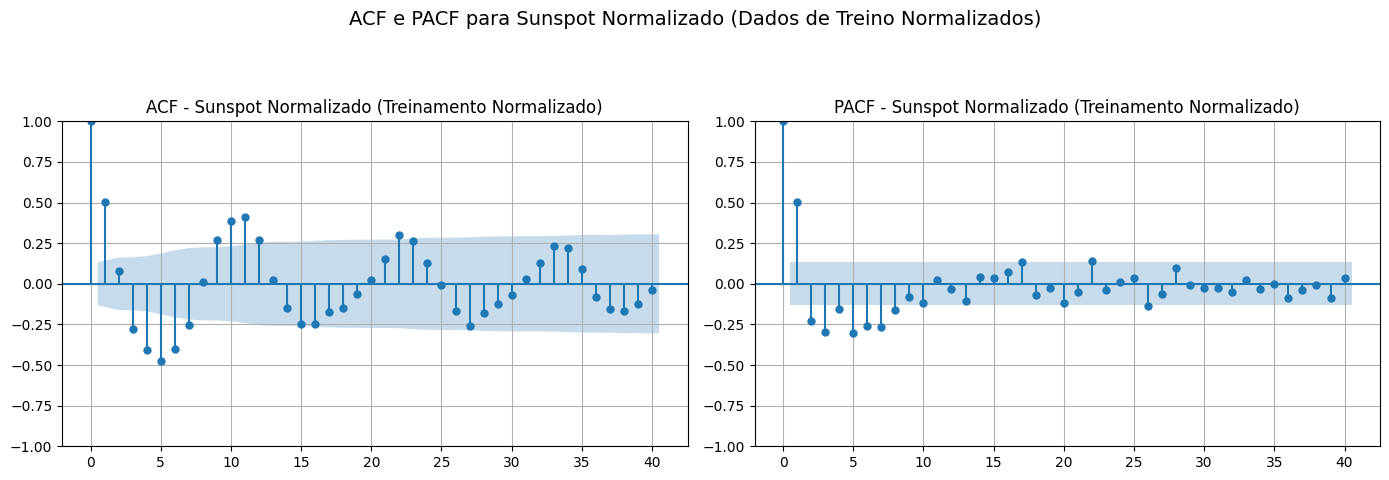


--- Gerando ACF e PACF para Lynx (Treino Normalizado) ---


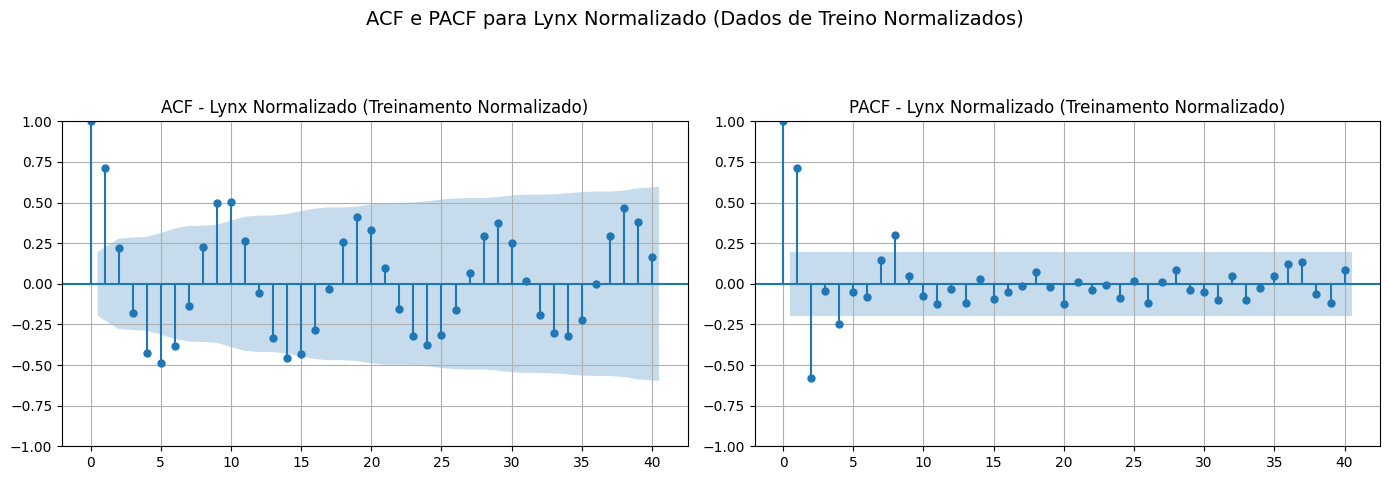


--- Gerando ACF e PACF para Exchange Rate (Treino Normalizado) ---


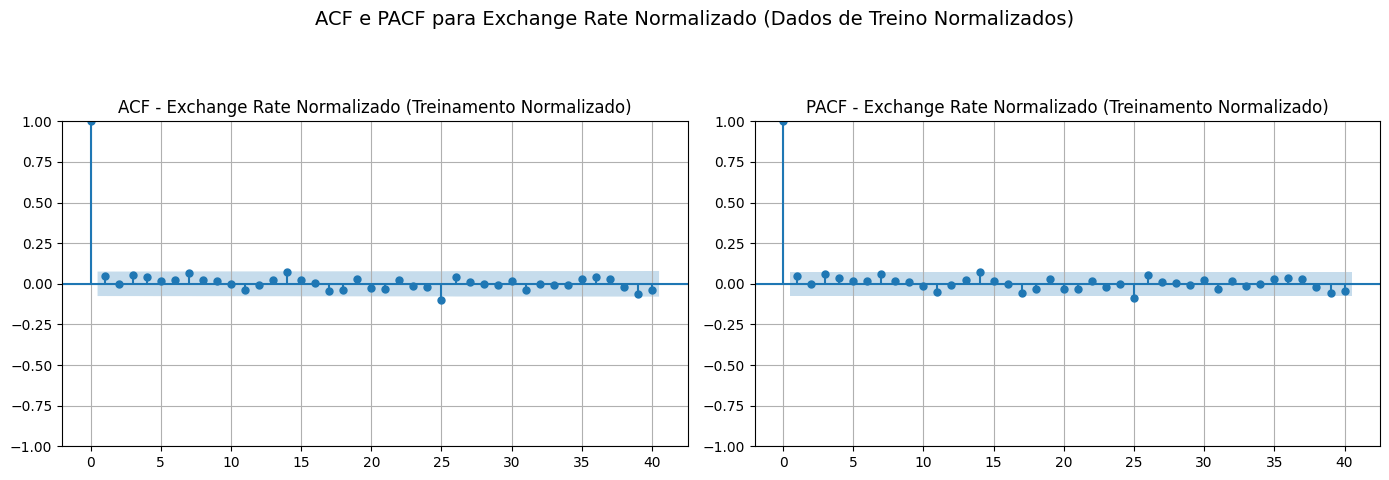


--- Gerando ACF e PACF para Nikkei 225 (Treino Normalizado) ---


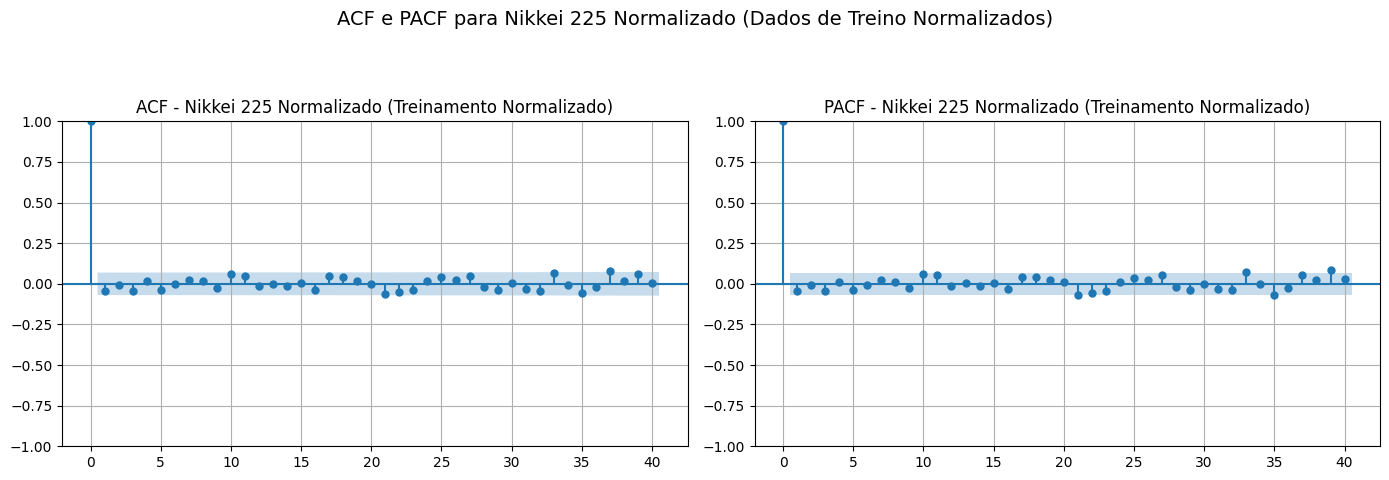

In [ ]:
print("\n--- Gerando ACF e PACF para Sunspot (Treino Normalizado) ---")
treinado_series_acf_pacf(train_sunspot_data_normalized, "Sunspot Normalizado")

print("\n--- Gerando ACF e PACF para Lynx (Treino Normalizado) ---")
treinado_series_acf_pacf(train_lynx_data_normalized, "Lynx Normalizado") # Corrected series_name

print("\n--- Gerando ACF e PACF para Exchange Rate (Treino Normalizado) ---")
treinado_series_acf_pacf(train_exchangerate_data_normalized, "Exchange Rate Normalizado")

print("\n--- Gerando ACF e PACF para Nikkei 225 (Treino Normalizado) ---")
treinado_series_acf_pacf(train_nikkei225_data_normalized, "Nikkei 225 Normalizado")



In [ ]:
"""
 Intuição sobre ACF e PACF
ACF → Toda a correlação direta + indireta.

PACF → Apenas a correlação direta, removendo o efeito de lags intermediários.

🧪 Como Interpretar os Gráficos
Eixo X: Lags (defasagens).

Eixo Y: Coeficiente de correlação (entre -1 e 1).

Faixa azul: Intervalo de confiança. Valores fora dessa faixa são significativos,
Se os pontos estiverem dentro da faixa azul (intervalo de confiança de 95%), consideramos não significativo.

Pontos fora da faixa azul sugerem autocorrelação significativa (existência de padrão).

ACF: Mede a correlação da série com suas defasagens (lags). Útil para identificar a ordem q (média móvel).

PACF: Mede a correlação parcial, ou seja, remove o efeito das defasagens anteriores. Útil para identificar a ordem p (autoregressivo).


No arima >>Seleção de Ordem para ARIMA (p, d, q)<<
Ver ACF e PACF da série estacionária (ou dos resíduos do ARIMA).

PACF corta em um ponto → sugere valor de p.

ACF corta em um ponto → sugere valor de q.
""""

#lynx
#ARIMA(1,0,2), ARIMA(2,0,2),

#sunport
#AR(1) como ponto de partida.
#Testar também ARMA(1,1) (para capturar as oscilações no ACF).
#Se for usar ARIMA: considerar ARIMA(1,d,1), com d estimado pela série original (antes da normalização).

#os outros dois modelos parecem darem nulo , por serem muito independetes

#validação

#janelamento

In [ ]:
def create_sliding_windows(series, window_size):
    list_of_sliding_windows = []
    series_values = series.values if isinstance(series, pd.Series) else series

    if len(series_values) < window_size + 1:
        return np.empty((0, window_size + 1))

    for i in range(len(series_values) - window_size):
        window = series_values[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows)


# Processando cada dataset
for name, data_splits in datasets_to_process.items():
    train_data = data_splits["train"]
    test_data = data_splits["test"]
    window_size = window_sizes[name]

    # Criar janelas para treino
    train_windows = create_sliding_windows(train_data, window_size)
    X_train = train_windows[:, :-1]
    y_train = train_windows[:, -1]

    # Criar janelas para teste
    test_windows = create_sliding_windows(test_data, window_size)
    X_test = test_windows[:, :-1]
    y_test = test_windows[:, -1]


In [ ]:
np.random.seed(42)
def create_sliding_windows(series, window_size):
    list_of_sliding_windows = []
    series_values = series.values if isinstance(series, pd.Series) else series

    if len(series_values) < window_size + 1:
        # Not enough data for even one window
        return np.empty((0, window_size + 1))

    # The number of possible windows
    list_size_to_iterate = len(series_values) - window_size

    for i in range(list_size_to_iterate):
        window = series_values[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows)

# Dicionário com os tamanhos de janela para cada dataset
window_sizes = {
    "sunpot": 10,  # ajuste conforme necessário
    "lynx": 10,    # ajuste conforme necessário
    "exchangerate": 10,  # ajuste conforme necessário
    "nikkei225": 10  # ajuste conforme necessário
}


    # Criar variáveis específicas para cada dataset
    globals()[f"X_train_{name}"] = X_train
    globals()[f"y_train_{name}"] = y_train
    globals()[f"X_test_{name}"] = X_test
    globals()[f"y_test_{name}"] = y_test
    globals()[f"windows_train_{name}"] = train_windows
    globals()[f"windows_test_{name}"] = test_windows

    # Exibir informações
    print(f"\nDataset: {name}")
    print(f"Window size: {window_size}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print(f"Train windows shape: {train_windows.shape}")
    print(f"Test windows shape: {test_windows.shape}")

# Exemplo de como acessar os dados do sunpot:
print("\nExemplo de acesso aos dados do sunpot:")
print("X_train_sunpot shape:", X_train_sunpot.shape)
print("y_train_sunpot shape:", y_train_sunpot.shape)
print("X_test_sunpot shape:", X_test_sunpot.shape)
print("y_test_sunpot shape:", y_test_sunpot.shape)
print("windows_train_sunpot shape:", windows_train_sunpot.shape)
print("windows_test_sunpot shape:", windows_test_sunpot.shape)

#seleção de lag com ga

In [ ]:

np.random.seed(42)

  X_train_nikkei225_data
  , y_train_nikkei225_data,
  y_val_nikkei225_data,
   X_test_final_nikkei225_data, y_test_final_nikkei225_data


  X_train_exchange_data
  , y_train_exchange_data,
  y_val_exchange_data,
   X_test_final_exchange_data, y_test_final_exchange_data


  X_train_sunspot_data
  , y_train_sunspot_data,
  y_val_sunspot_data,
   X_test_final_sunspot_data, y_test_final_sunspot_data

  X_train_lynx_data
  , y_train_lynx_data,
  y_val_lynx_data,
   X_test_final_lynx_data, y_test_final_lynx_data


    windows_actual_train = create_sliding_windows(actual_train_data_for_ml, window_size_example)
    windows_val = create_sliding_windows(val_data_for_ml, window_size_example)
    windows_test_final = create_sliding_windows(test_data_raw, window_size_example)

    X_train_ga, y_train_ga = windows_actual_train[:, :-1], windows_actual_train[:, -1]
    X_val_ga, y_val_ga = windows_val[:, :-1], windows_val[:, -1] if windows_val.size > 0 else np.array([])
    X_test_ga, y_test_ga = windows_test_final[:, :-1], windows_test_final[:, -1]

    processed_data[name] = {
        "X_train": X_train_ga, "y_train": y_train_ga,
        "X_val": X_val_ga, "y_val": y_val_ga,
        "X_test": X_test_ga, "y_test": y_test_ga,
        "window_size": window_size_example # Max lags disponíveis para seleção
    }

    print(f"X_train GA shape: {X_train_ga.shape}, y_train GA shape: {y_train_ga.shape}")
    print(f"X_val GA shape: {X_val_ga.shape}, y_val GA shape: {y_val_ga.shape}")

    # --- Teste da função ACF antes do GA ---
    print("\n--- Análise de Lags Significativos pela ACF (para série original) ---")
    significant_lags_raw_acf = select_significant_lags_acf(synthetic_data_scaled, max_lag=window_size_example)
    # Plotar para visualização
    plot_acf_pacf(synthetic_data_scaled, lags=window_size_example)
    print(f"Lags significativos para a série original (base para janelamento): {significant_lags_raw_acf}")


# --- 1. Configurar DEAP para Seleção de Lags (Features) ---

# Queremos minimizar o RMSE (então o peso é -1.0)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Cada indivíduo é uma lista binária, representando a seleção de lags
creator.create("Individual", list, fitness=creator.FitnessMin)

# A dimensão do indivíduo é o número de lags máximo disponível (window_size)
N_LAG_FEATURES = processed_data[name]["window_size"]
if N_LAG_FEATURES == 0:
    print("Não há features de lag disponíveis para o GA. Verifique window_size e comprimento dos dados.")
    exit() # Ou continue para o próximo dataset, dependendo da sua lógica

toolbox = base.Toolbox()

# Gerador de atributos: 0 ou 1 para cada lag (selecionado ou não)
toolbox.register("attr_bool", random.randint, 0, 1)

# Indivíduo: Uma lista de N_LAG_FEATURES de 0s e 1s
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=N_LAG_FEATURES)

# População: Uma lista de indivíduos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# --- 2. Função de Avaliação (Fitness Function) ---
# Esta função treina o modelo de ML com os lags selecionados e retorna o RMSE na validação

def eval_lag_selection(individual):
    # Verificar se pelo menos um lag foi selecionado
    if sum(individual) == 0:
        return (float('inf'),) # Penaliza indivíduos que não selecionam lags

    # Selecionar as colunas (lags) com base no indivíduo binário
    # Os índices de coluna são (lag - 1) se os lags forem 1 a N_LAG_FEATURES
    selected_lag_indices = [i for i, select in enumerate(individual) if select == 1]

    if not selected_lag_indices: # Caso raro onde sum(individual) > 0 mas lista está vazia
        return (float('inf'),)

    # Pegar os dados para treinamento e validação com os lags selecionados
    X_train_selected = X_train_ga[:, selected_lag_indices]
    y_train_selected = y_train_ga # Target permanece o mesmo
    X_val_selected = X_val_ga[:, selected_lag_indices]
    y_val_selected = y_val_ga # Target permanece o mesmo

    # Tratar caso em que X_val_selected fica vazio (se y_val_ga era vazio)
    if X_val_selected.size == 0 or y_val_selected.size == 0:
        # Se não há dados de validação suficientes para a janela selecionada,
        # pode ser um erro ou uma condição que deve ser penalizada.
        return (float('inf'),)

    try:
        # Treinar o Modelo de Machine Learning (MLPRegressor neste exemplo)
        # Ajuste hidden_layer_sizes, max_iter conforme necessário
        # Para um SVR, seria: model = SVR(kernel='rbf')
        model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=200, random_state=42, early_stopping=True, n_iter_no_change=10)

        # Escalar X e y se o modelo exigir (MLP geralmente se beneficia disso)
        # ATENÇÃO: Se seus X_train_ga e y_train_ga já estão normalizados pelo scaler_global,
        # você pode pular esta etapa de escalonamento DENTRO da função de fitness.
        # Caso contrário, ESCALONE AQUI APENAS O X_train_selected E APLIQUE AO X_val_selected.
        # Para este exemplo, assumimos que X_train_ga e y_train_ga já estão normalizados para o range [0,1]
        # Se os dados não foram normalizados na fase de janela, esta é a etapa para normalizar.
        # scaler_X_local = MinMaxScaler()
        # scaler_y_local = MinMaxScaler()
        # X_train_scaled = scaler_X_local.fit_transform(X_train_selected)
        # y_train_scaled = scaler_y_local.fit_transform(y_train_selected.reshape(-1, 1)).ravel()
        # X_val_scaled = scaler_X_local.transform(X_val_selected)

        # Treinar o modelo
        model.fit(X_train_selected, y_train_selected) # Assumindo que dados já normalizados globalmente

        # Fazer previsões no conjunto de validação
        predictions = model.predict(X_val_selected)

        # Calcular RMSE
        rmse = sqrt(mean_squared_error(y_val_selected, predictions))

        return (rmse,) # Retornar RMSE (a ser minimizado)

    except Exception as e:
        # print(f"Erro ao avaliar indivíduo {individual}: {e}") # Para depuração
        return (float('inf'),) # Retornar fitness infinito para modelos que falham

toolbox.register("evaluate", eval_lag_selection)

# --- 3. Operadores Genéticos ---
# Crossover: Combina genes de dois pais
toolbox.register("mate", tools.cxTwoPoint) # Crossover de dois pontos
# Mutação: Altera aleatoriamente alguns genes (vira 0 para 1, ou 1 para 0)
# indpb é a probabilidade de cada atributo ser mutado
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) # Mutação de flip de bit
# Seleção: Escolhe os indivíduos mais aptos para a próxima geração
toolbox.register("select", tools.selTournament, tournsize=3) # Seleção por torneio

# --- 4. Parâmetros do Algoritmo Genético ---
POPULATION_SIZE = 100 # Tamanho da população (número de combinações de lags testadas por geração)
NGEN = 50 # Número de gerações (quantas vezes o processo evolutivo se repete)
CXPB = 0.7 # Probabilidade de crossover (indivíduos trocarem genes)
MUTPB = 0.2 # Probabilidade de mutação (genes individuais mudarem)

# --- 5. Executar o GA ---
print("\n--- Iniciando Algoritmo Genético para Seleção de Lags (Features) ---")

pop = toolbox.population(n=POPULATION_SIZE)
hof = tools.HallOfFame(1) # Para guardar o melhor indivíduo encontrado em todas as gerações
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

# O algoritmo principal
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                               stats=stats, halloffame=hof, verbose=True)

# --- 6. Resultados do GA ---
best_individual_ga = hof[0]
best_rmse_ga = hof[0].fitness.values[0]

print("\n--- Resultados Finais do Algoritmo Genético ---")
print(f"Melhor seleção de lags (individual): {best_individual_ga}")
print(f"RMSE correspondente no conjunto de validação: {best_rmse_ga:.4f}")

# Mapear o indivíduo binário de volta para os números dos lags selecionados
selected_lags_by_ga = [i + 1 for i, bit in enumerate(best_individual_ga) if bit == 1]
print(f"Lags selecionados (baseado na window_size {N_LAG_FEATURES}): {selected_lags_by_ga}")

In [ ]:
lags_chosen_pm10 = select_lag_acf(train_pm10, 30)

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[0,lags_chosen_pm10]

In [ ]:
#𝑦train contém os valores que o modelo deve prever.
y_train_pm10[0]

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[1,lags_chosen_pm10]

In [ ]:
#
y_train_pm10[1]

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[2,lags_chosen_pm10]

#arima model

In [ ]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

warnings.filterwarnings("ignore")

# Carregamento da série temporal
data = pd.read_csv("sua_serie.csv", parse_dates=["data"], index_col="data")
series = data['valor']

# Divisão treino/teste
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Parâmetros a testar
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_score, best_cfg = float("inf"), None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        if rmse < best_score:
            best_score, best_cfg = rmse, param
        print(f"ARIMA{param} RMSE={rmse:.3f}")
    except:
        continue

print(f"\nMelhor configuração: ARIMA{best_cfg} com RMSE={best_score:.3f}")


In [ ]:

#lynx
#ARIMA(1,0,2), ARIMA(2,0,2),
sunspot(,1,)
exchange(,1,)
nikkie225(,1,)

#Teste de Ljung-Box

In [ ]:
#The Ljung-Box test is widely used to test for autocorrelation remaining in the residuals after fitting a model to a time series. In this post, I look at the degrees of freedom used in such tests.

#salvar resultados

In [ ]:

import pandas as pd

def salvar_resultados(nome_modelo, y_real, y_previsto, residuos, caminho='resultados'):
    import os
    os.makedirs(caminho, exist_ok=True)

    df_resultado = pd.DataFrame({
        'y_real': y_real,
        'y_previsto': y_previsto,
        'residuo': residuos
    })
    df_resultado.to_csv(f"{caminho}/resultados_{nome_modelo}.csv", index=False)
    print(f"📁 Resultados salvos: {caminho}/resultados_{nome_modelo}.csv")

#MLP

In [ ]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):

    neuronios = [5, 10,25]
    func_activation = [ 'tanh','logistic', 'relu']
    alg_treinamento = ['lbfgs', 'sgd', 'adam']

    max_iteracoes = [5000, 10000, 20000]  # Tente valores maiore
    learning_rate = ['adaptive']#, 'invscaling', 'adaptive']

    best_result = np.Inf
    """para otimizar o código reduzindo os laços utilize o itertools:

    import itertools
    hyper_param = list(itertools.product(neuronios,func_activation,alg_treinamento,max_iteracoes, learning_rate))
    for i, j, l, m, n in hyper_param:

    """

    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):

                        for e in range(0,num_exec):
                            mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])
                            mlp.fit(x_train, y_train)
                            predict_validation = mlp.predict(x_val)

                            mse = MSE(y_val, predict_validation)


                            if mse < best_result:
                                best_result = mse
                                select_model = mlp
                                print('func: ', func_activation[j])





    return select_model

#SVM

#LSTM


# SALVAR TODOS OS CONJUNTOS PROCESSADOS PARA CADA DATASET


In [ ]:
import os
# Definindo o diretório onde os arquivos serão salvos
output_dir = "processed_time_series_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Diretório '{output_dir}' criado.")

print("\n--- Salvando todos os conjuntos processados para cada dataset ---")

for name, data_sets in processed_data.items():
    file_path = os.path.join(output_dir, f"{name}_sets.npz")
    np.savez_compressed(
        file_path,
        X_train=data_sets["X_train"],
        y_train=data_sets["y_train"],
        X_val=data_sets["X_val"],
        y_val=data_sets["y_val"],
        X_test=data_sets["X_test"],
        y_test=data_sets["y_test"]
    )
    print(f"'{name}_sets.npz' salvo com sucesso em '{output_dir}'.")

print("\nTodos os conjuntos foram salvos!")

#ajuda ajuda alguem me ajuda

In [ ]:
# Referências para Modelagem de Séries Temporais



#https://otexts.com/fpppy/nbs/02-graphics.html
#https://www.tylervigen.com/spurious-correlations

#https://www.ibm.com/br-pt/think/topics/autocorrelation
#https://www.linkedin.com/pulse/como-realizar-uma-an%C3%A1lise-de-correla%C3%A7%C3%A3o-em-s%C3%A9ries-r-oliveira-batista/
#https://otexts.com/fpppg/acf.html




## ARIMA / SARIMA

- [GitHub: ARIMA model time series prediction (Python)](https://github.com/liannewriting/YouTube-videos-public/tree/main/arima-model-time-series-prediction-python)
- [YouTube: ARIMA Time Series Tutorial](https://www.youtube.com/watch?v=Rl_tMSc_wKo)
- [Medium: Time Series Forecasting with ARIMA, SARIMA and SARIMAX](https://medium.com/data-science/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6)
- [Towards Data Science: Understanding ARIMA Time Series Modeling](https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8/)
- [Towards Data Science: Time Series Forecasting using Auto-ARIMA in Python](https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd)
- [Medium: Estimating ARIMA and SARIMA coefficients using Genetic Algorithm](https://medium.com/@mouse3mic3/estimating-arima-and-sarima-coefficients-using-genetic-algorithm-03f24ab66589)
- [Kaggle Discussions: ARIMA Questions and Answers](https://www.kaggle.com/discussions/questions-and-answers/199346)
- [DataCamp Tutorial: ARIMA](https://www.datacamp.com/tutorial/arima)
- [Medium: ARIMA Model from Scratch in Python](https://medium.com/analytics-vidhya/arima-model-from-scratch-in-python-489e961603ce)

## Artigos Científicos e Modelos Híbridos

- [arXiv Paper (2025): Time Series Forecasting with Large Language Models](https://arxiv.org/pdf/2504.08940)
- [Neurocomputing Paper: Hybrid Forecasting Models](https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf)
- [GitHub: Additive Hybrid Model with MLP](https://github.com/domingos108/hybrid_system_forecast/blob/master/additive_hybrid_model_mlp.ipynb)

## Séries Temporais e Pandas

- [Towards Data Science: Introducing Time Series in Pandas (Parte 1)](https://towardsdatascience.com/introducing-time-series-in-pandas-09c7cab569b4/)
- [Pandas Docs: Time Series Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

## Redes Neurais para Séries Temporais (MLP, LSTM, GRU)

- [Towards Data Science: Neural Network MLP for Time Series Forecasting in Practice](https://towardsdatascience.com/neural-network-mlp-for-time-series-forecasting-in-practice-04c47c1e3711/)
- [Towards Data Science: Exploring the LSTM Neural Network Model for Time Series](https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf/)
- [Gabe Nosek: Time Series Stock Prediction with LSTM](https://gabenosek.medium.com/time-series-stock-prediction-with-lstm-eb04f2224c22)
- [Medium: Time Series Prediction with LSTM, Bi-LSTM, GRU](https://medium.com/data-science-data-engineering/time-series-prediction-lstm-bi-lstm-gru-99334fc16d75)
- [Towards Data Science: Time Series ARIMA vs SARIMA vs LSTM - Hands-on Tutorial](https://towardsdatascience.com/time-series-arima-vs-sarima-vs-lstm-hands-on-tutorial-bd5630298da3/)
- [Towards Data Science: Hands-on Neural Networks and Time Series with Python](https://towardsdatascience.com/hands-on-neural-networks-and-time-series-with-python-a61d7d75f3d9/)
- [Medium (Português): Introdução às Redes LSTM - Prevendo valor de ações na bolsa](https://medium.com/datarisk-io/introdu%C3%A7%C3%A3o-%C3%A0s-redes-lstm-prevendo-valor-de-a%C3%A7%C3%B5es-na-bolsa-df270ca0cee5)
- [Towards Data Science: LSTM Framework for Univariate Time Series Prediction](https://towardsdatascience.com/lstm-framework-for-univariate-time-series-prediction-d9e7252699e/)
- [Mario Filho: Como prever séries temporais com LSTM em Python (tutorial em Português)](https://mariofilho.com/como-prever-series-temporais-com-lstm-em-python/)
- [Medium: Understanding LSTMs - LSTM Implementation from Scratch](https://medium.com/@samina.amin/understanding-lstms-lstm-implementation-from-scratch-18965a150eca)
- [Medium: Building a Neural Network Zoo from Scratch - The Long Short-Term Memory Network](https://medium.com/@CallMeTwitch/building-a-neural-network-zoo-from-scratch-the-long-short-term-memory-network-1cec5cf31b7)
- [Kaggle: LSTM Neural Network from Scratch](https://www.kaggle.com/code/navjindervirdee/lstm-neural-network-from-scratch)

## Técnicas Auxiliares e Outros Temas em Séries Temporais

- [Towards Data Science: Fourier Transform for Time Series Plotting & Complex Numbers](https://towardsdatascience.com/fourier-transform-for-time-series-plotting-complex-numbers-9743ffe8a8bb/)
- [Towards Data Science: 3 Common Time Series Modeling Mistakes You Should Know](https://towardsdatascience.com/3-common-time-series-modeling-mistakes-you-should-know-a126df24256f/)
